# Team number: Group 5
# FULL names - Student ID numbers: 
- Khanh Van Nguyen - 47997710
- Thu Uyen Nguyen - 47996242
- Hue Nhi Tang - 47997893
- Raisa Rahman - 48657816
- Zareen Musarrat - 48027081

Acknowledgement Statement by students: <br>
Please keep one acknowledgment from the following<br>
	I acknowledge that I have only used GenAI (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions. <br>
- Refined insights for clearer communication and alignment with business context
- Rewrote analytical interpretations in natural, presentation-friendly language
- Fixed grammatical errors in reflective writing, reports, and presentation scripts
- Improved sentence flow and ensured professional tone
- Fixing the error during running code
- Listed down all the test can be used in the dataset


## Section 1: Clean the Dataset

#### Import Libraries & Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import math

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

#### Understanding Dataset

In [7]:
# Read dataset1
df1 = pd.read_csv('Dataset1.csv', encoding='ISO-8859-1')
df1.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,customer_order_number,dss_update_time
0,NaN,101,411800601,NaN,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,655.20,252.0,252.0,0.0,AUD,NaN,2217887,1.0,2865354.0,49:58.7
1,20200216.0,101,361000403,NaN,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,NaN,...,114.84,36.0,36.0,0.0,AUD,NaN,2185745,1.0,2833515.0,49:58.7
2,20230509.0,101,361000403,300.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,NaN,36.0,36.0,0.0,AUD,NaN,2217807,1.0,2864857.0,49:58.7
3,20230518.0,101,565540415,500.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,60.30,18.0,18.0,0.0,AUD,NaN,2222758,1.0,2869759.0,49:58.7
4,20200109.0,101,565540415,500.0,GENIE8WWWBC,LMP,LMP01008,LMP01,NaN,Trade,...,57.42,18.0,18.0,0.0,AUD,NaN,2170374,1.0,2819189.0,49:58.7


In [8]:
# Read dataset2
df2 = pd.read_csv('Dataset2.csv', encoding='ISO-8859-1')
df2.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_sales,value_cost,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,customer_order_number,dss_update_time
0,20210125,NaN,471150112,400.0,10311,COM,COM90001,COM90,5.0,Trade,...,-6.69,-3.810,-3.0,0,AUD,NaN,NaN,0,277995,49:58.7
1,20220513,NaN,277000801,200.0,10311,COM,COM90001,COM90,5.0,Trade,...,7.44,3.810,3.0,0,AUD,NaN,749295.0,0,867468,49:58.7
2,20230611,NaN,292314701,200.0,10350,OTH,999,14001,5.0,Trade,...,160.20,68.910,6.0,0,AUD,NaN,756507.0,0,880839,49:58.7
3,20240111,NaN,299480703,200.0,10350,OTH,999,14001,5.0,Trade,...,74.70,34.455,3.0,0,AUD,NaN,724149.0,0,821554,49:58.7
4,20210321,NaN,471150015,400.0,10364,COM,COM03002,COM03,5.0,Trade,...,135.00,84.420,18.0,0,AUD,NaN,738377.0,0,847171,49:58.7


## Section 1: Data Cleaning

### 1. Dataset1

#### [1.1] Exploring Data

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 34 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037197 non-null  float64
 1   company_code              1037205 non-null  int64  
 2   customer_code             1037203 non-null  object 
 3   customer_district_code    1037201 non-null  float64
 4   item_code                 1037204 non-null  object 
 5   business_area_code        1037204 non-null  object 
 6   item_group_code           1037204 non-null  object 
 7   item_class_code           1037203 non-null  object 
 8   item_type                 1037133 non-null  float64
 9   bonus_group_code          1037202 non-null  object 
 10  environment_group_code    1037204 non-null  object 
 11  technology_group_code     1037203 non-null  object 
 12  commission_group_code     1037199 non-null  object 
 13  reporting_classification  1

In [13]:
# Find the number of unique values in each column
df1.nunique()

accounting_date               1355
company_code                     9
customer_code                 6576
customer_district_code          16
item_code                    27322
business_area_code              28
item_group_code                560
item_class_code                197
item_type                        9
bonus_group_code                 2
environment_group_code           9
technology_group_code           97
commission_group_code            3
reporting_classification         2
light_source                     3
warehouse_code                  55
abc_class_code                  10
abc_class_volume                10
business_chain_l1_code          42
business_chain_l1_name          39
contact_method_code            788
salesperson_code               253
order_type_code                 36
market_segment                   1
value_sales                  85145
value_cost                    1527
value_quantity                1527
value_price_adjustment           2
currency            

In [14]:
# Check the structure of the dataset
df1.shape

(1037205, 34)

#### [1.2] Checking Unique Values and Data Correction

After exploring dataset, we can see many columns have white spaces in the values. We will remove these white spaces from the values in all columns.

In [17]:
# Convert non-string values to strings in object columns, then strip whitespace
df1 = df1.apply(lambda x: x.where(x.isna(), x.astype(str).str.strip()) if x.dtype == "object" else x)

In [18]:
# Check unique values in 'currency' column
df1['currency'].unique()

array(['AUD', 'USD', 'AUS', 'NZD', '', 'EUR'], dtype=object)

In [19]:
# Correct inconsistent currency names
corrections_currency = {'AUS': 'AUD', '': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'currency' column
df1['currency'] = df1['currency'].replace(corrections_currency)

In [20]:
# Check unique values in 'currency' column
df1['currency'].unique()

array(['AUD', 'USD', 'NZD', nan, 'EUR'], dtype=object)

In [21]:
# Check unique values in 'business_area_code' column
df1['business_area_code'].unique()

array(['LMP', 'FLD', 'OTH', 'SUR', 'COM', 'DLT', 'TRO', 'URB', 'HLB',
       'SAE', 'RWY', 'LCP', 'PEN', 'EXL', 'TAL', '945', '950', '980',
       '920', '960', '910', '930', '999', '970', '940', '985', 'IAE',
       'IAI', nan], dtype=object)

In [22]:
# Match some of the business area codes to existing codes
corrections_business = {'920': 'FLD', '930': 'RWY', '999': 'OTH', '970': 'LMP'}
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'business_area_code' column
df1['business_area_code'] = df1['business_area_code'].replace(corrections_business)

In [23]:
# Check unique values in 'business_area_code' column
df1['business_area_code'].unique()

array(['LMP', 'FLD', 'OTH', 'SUR', 'COM', 'DLT', 'TRO', 'URB', 'HLB',
       'SAE', 'RWY', 'LCP', 'PEN', 'EXL', 'TAL', '945', '950', '980',
       '960', '910', '940', '985', 'IAE', 'IAI', nan], dtype=object)

In [24]:
# Check unique values in 'technology_group_code' column
df1['technology_group_code'].unique()

array(['SYLV', 'NA', 'PIER', '96', '219', '92', '214', '380', '102',
       '123', '110', '98', '213', '580', '108', '999', '198', 'SCHR',
       '82', '140', '540', 'AUST', '480', '760', '460', '600', '520',
       '998', '570', '280', '330', '220', '415', '340', '225', 'CSE',
       '565', '410', '560', '800', '680', '320', '550', '400', '160',
       '440', '420', '500', '555', '360', '290', '780', '545', '181',
       '240', '640', '820', '595', '300', '830', '70', '850', '86', '720',
       '740', '310', 'FGDFT', '350', '206', '64', 'PNZ', '63', 'CROM',
       '100', '78', '207', '208', '76', '211', '205', '85', '90', '68',
       '130', 'GLG', 'INLIT', '72', '61', '880', '217', '215', '80',
       '210', 'INZ', '250', nan, '118', '66'], dtype=object)

In [25]:
# Convert 'NA' to NaN
corrections_technology = {'NA': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'technology_group_code' column
df1['technology_group_code'] = df1['technology_group_code'].replace(corrections_technology)

In [26]:
# Check unique values in 'technology_group_code' column
df1['technology_group_code'].unique()

array(['SYLV', nan, 'PIER', '96', '219', '92', '214', '380', '102', '123',
       '110', '98', '213', '580', '108', '999', '198', 'SCHR', '82',
       '140', '540', 'AUST', '480', '760', '460', '600', '520', '998',
       '570', '280', '330', '220', '415', '340', '225', 'CSE', '565',
       '410', '560', '800', '680', '320', '550', '400', '160', '440',
       '420', '500', '555', '360', '290', '780', '545', '181', '240',
       '640', '820', '595', '300', '830', '70', '850', '86', '720', '740',
       '310', 'FGDFT', '350', '206', '64', 'PNZ', '63', 'CROM', '100',
       '78', '207', '208', '76', '211', '205', '85', '90', '68', '130',
       'GLG', 'INLIT', '72', '61', '880', '217', '215', '80', '210',
       'INZ', '250', '118', '66'], dtype=object)

In [27]:
# Check unique values in 'environment_group_code' column
df1['environment_group_code'].unique()

array(['S', 'P', 'D', 'Z', 'C', 'M', 'R', 'I', 'NA', nan], dtype=object)

In [28]:
# Convert 'NA' to NaN
corrections_environment = {'NA': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'environment_group_code' column
df1['environment_group_code'] = df1['environment_group_code'].replace(corrections_environment)

In [29]:
# Check unique values in 'environment_group_code' column
df1['environment_group_code'].unique()

array(['S', 'P', 'D', 'Z', 'C', 'M', 'R', 'I', nan], dtype=object)

In [30]:
# Check unique values in 'warehouse_code' column
df1['warehouse_code'].unique()

array(['Q1', 'V0', 'S0', 'T0', 'Q0', 'N0', nan, 'KN0', 'W0', 'S1', 'Unk',
       'GS0', 'GN0', 'CN0', 'CQ0', 'CV0', 'GW0', 'CS0', 'CW0', 'GQ0',
       'AS0', 'CT0', 'CS1', 'CN1', 'CZ0', 'LW0', 'LQ0', 'LS1', 'LV0',
       'LN9', 'LS0', 'FWE', 'EN0', 'FW2', 'JT0', 'FA1', 'FWA', 'FA2',
       '1N0', '1S0', '5N2', '5V0', '5S0', '5W0', '1V0', '1Q0', '1N1',
       '1W0', '1Q1', '5Q0', '5T0', '5S1', '5N1', '1T0', '1S1', '5Q1'],
      dtype=object)

In [31]:
# Convert 'Unknown' to NaN
corrections_warehouse = {'Unk': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'warehouse_code' column
df1['warehouse_code'] = df1['warehouse_code'].replace(corrections_warehouse)

In [32]:
# Check unique values in 'warehouse_code' column
df1['warehouse_code'].unique()

array(['Q1', 'V0', 'S0', 'T0', 'Q0', 'N0', nan, 'KN0', 'W0', 'S1', 'GS0',
       'GN0', 'CN0', 'CQ0', 'CV0', 'GW0', 'CS0', 'CW0', 'GQ0', 'AS0',
       'CT0', 'CS1', 'CN1', 'CZ0', 'LW0', 'LQ0', 'LS1', 'LV0', 'LN9',
       'LS0', 'FWE', 'EN0', 'FW2', 'JT0', 'FA1', 'FWA', 'FA2', '1N0',
       '1S0', '5N2', '5V0', '5S0', '5W0', '1V0', '1Q0', '1N1', '1W0',
       '1Q1', '5Q0', '5T0', '5S1', '5N1', '1T0', '1S1', '5Q1'],
      dtype=object)

In [33]:
# Count each unique value in 'contact_method_code' column
df1['contact_method_code'].value_counts()

contact_method_code
NA     992851
FAX     23268
Z38      1746
EDI      1615
TBA      1385
        ...  
GRM         1
ECM         1
TKA         1
PLA         1
SKA         1
Name: count, Length: 788, dtype: int64

In [34]:
# Convert "NA" to NaN
df1['contact_method_code'] = df1['contact_method_code'].replace('NA', np.nan)

#### [1.3] Missing Values

In [36]:
# Find the number of missing values in each column
df1.isnull().sum()

accounting_date                   8
company_code                      0
customer_code                     2
customer_district_code            4
item_code                         1
business_area_code                1
item_group_code                   1
item_class_code                   2
item_type                        72
bonus_group_code                  3
environment_group_code          135
technology_group_code        121125
commission_group_code             6
reporting_classification          6
light_source                      6
warehouse_code                77571
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            1
business_chain_l1_name            5
contact_method_code          992855
salesperson_code                  2
order_type_code                   1
market_segment                    1
value_sales                       2
value_cost                        0
value_quantity                    2
value_price_adjustment      

**Comments:** There are two columns: 'item_source_class' and 'contact_method_code' that contain more than 50% missing values. We will drop these columns.

In [38]:
# Drop the 'item_source_class', 'contact_method_code' columns
df1.drop(columns=['item_source_class', 'contact_method_code'], inplace=True)

**Comments:** For remaining columns with missing values, we will drop the rows with missing values.

In [40]:
# Drop rows that have more than 50% missing values
# Calculate the threshold: number of non-NA values required to keep the row
# For more than 50% missing, we need at least 50% non-missing values
threshold = int(df1.shape[1] * 0.5) + 1  # +1 because "more than 50%" means > 50%

# Drop rows with less than threshold non-NA values
df1 = df1.dropna(thresh=threshold)
df1.shape

(1037205, 32)

In [41]:
# Select categorical columns (object dtype usually)
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()

# Add specific columns to the list (if not already in categorical_cols)
additional_cols = ['customer_district_code', 'line_number', 'customer_order_number', 'accounting_date']

# Combine and remove duplicates if needed
subset_cols = list(set(categorical_cols + additional_cols))

# Drop rows with missing values in any of these columns
df1 = df1.dropna(subset=subset_cols)

# Check the number of missing values in each column
df1.isnull().sum()

accounting_date              0
company_code                 0
customer_code                0
customer_district_code       0
item_code                    0
business_area_code           0
item_group_code              0
item_class_code              0
item_type                   42
bonus_group_code             0
environment_group_code       0
technology_group_code        0
commission_group_code        0
reporting_classification     0
light_source                 0
warehouse_code               0
abc_class_code               0
abc_class_volume             0
business_chain_l1_code       0
business_chain_l1_name       0
salesperson_code             0
order_type_code              0
market_segment               0
value_sales                  1
value_cost                   0
value_quantity               0
value_price_adjustment       1
currency                     0
invoice_number               0
line_number                  0
customer_order_number        0
dss_update_time              0
dtype: i

In [42]:
# Drop all the remaining missing values
df1 = df1.dropna()

# Check the number of missing values in each column
df1.isnull().sum()

accounting_date             0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency                    0
invoice_number              0
line_number                 0
customer_order_number       0
dss_update_time             0
dtype: int64

**Comment**: Because the missing values in each rows are not significant, and do not affect the dataset if drop. Therefore, We will drop all the missing values

#### [1.4] Data Type Conversion

[1.4.1] Convert currency to AUD

In [46]:
# Copy the value of currency into another column
df1['original_currency'] = df1['currency'].copy().astype(str)

# Currency conversion rates
conversion_rates = {'AUD': 1, 'USD': 0.65, 'NZD': 1.08, 'EUR': 0.57}

# Convert all value_sale, value_cost to AUD based on the currency
df1['value_sales'] = df1['value_sales'] * df1['currency'].map(conversion_rates)
df1['value_cost'] = df1['value_cost'] * df1['currency'].map(conversion_rates)

# Change the currency to AUD
df1['currency'] = 'AUD'

In [47]:
# Check unique values after change the 'currency' column to 'AUD'
df1['currency'].unique()

array(['AUD'], dtype=object)

[1.4.2] Convert 'accounting_date' to datetime

In [49]:
# Convert 'accounting_date' to day, month, and year columns
df1['accounting_date'] = pd.to_datetime(df1['accounting_date'], format='%Y%m%d', errors='coerce')

df1['accounting_day'] = df1['accounting_date'].dt.day
df1['accounting_month'] = df1['accounting_date'].dt.month
df1['accounting_year'] = df1['accounting_date'].dt.year

df1.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_price_adjustment,currency,invoice_number,line_number,customer_order_number,dss_update_time,original_currency,accounting_day,accounting_month,accounting_year
12,2020-01-17,101,467400401,400.0,GENIE11WWWES,LMP,LMP01008,LMP01,5.0,Trade,...,0.0,AUD,2173329,1.0,2822216.0,49:58.7,AUD,17.0,1.0,2020.0
13,2022-04-20,101,277000802,200.0,GIGAW2000/4W,FLD,FLD03002,FLD03,1.0,Professional,...,0.0,AUD,2210804,2.0,2850386.0,49:58.7,AUD,20.0,4.0,2022.0
14,2022-04-04,101,361000417,300.0,GENIE11WWWES,LMP,LMP01008,LMP01,5.0,Trade,...,0.0,AUD,2205124,1.0,2852375.0,49:58.7,AUD,4.0,4.0,2022.0
16,2020-01-25,101,361000450,300.0,GENIE11WWWES,LMP,LMP01008,LMP01,5.0,Trade,...,0.0,AUD,2177128,1.0,2825539.0,49:58.7,AUD,25.0,1.0,2020.0
17,2024-04-27,101,361000417,300.0,GENIE11WWWES,LMP,LMP01008,LMP01,5.0,Trade,...,0.0,AUD,2213107,1.0,2860530.0,49:58.7,AUD,27.0,4.0,2024.0


#### [1.5] Duplicates

In [51]:
duplicate_rows = df1.duplicated()
print("Number of duplicate rows",duplicate_rows.sum())

Number of duplicate rows 1528


In [52]:
# Drop duplicate rows
df1.drop_duplicates(inplace=True)
df1.shape

(878820, 36)

#### [1.6] Outliers

1.6.1: Visualise Outliers

Text(0, 0.5, 'Value Quantity')

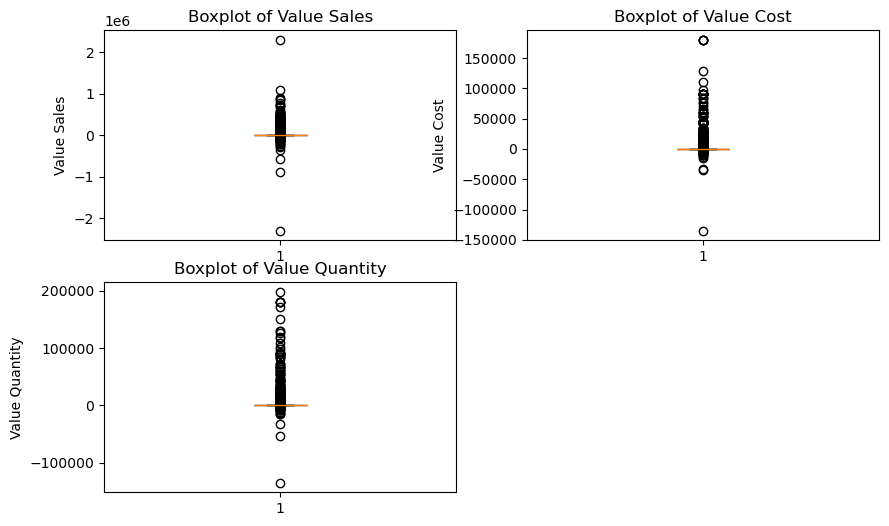

In [55]:
# Create boxplots to identify outliers
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
plt.boxplot(df1['value_sales'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Sales')
plt.ylabel('Value Sales')

plt.subplot(2, 2, 2)
plt.boxplot(df1['value_cost'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Cost')
plt.ylabel('Value Cost')

plt.subplot(2, 2, 3)
plt.boxplot(df1['value_quantity'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Quantity')
plt.ylabel('Value Quantity')

1.6.2: Removing Outliers

In [57]:
def remove_outliers_iqr(df1, columns):
    df1_filtered = df1.copy()
    for col in columns:
        Q1 = df1_filtered[col].quantile(0.25)
        Q3 = df1_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep rows where col values are within the bounds
        df1_filtered = df1_filtered[(df1_filtered[col] >= lower_bound) & (df1_filtered[col] <= upper_bound)]
    return df1_filtered

# Columns to remove outliers from
cols = ['value_sales', 'value_cost', 'value_quantity']

# Remove outliers
df1_cleaned = remove_outliers_iqr(df1, cols)

# Check new shape
print(f"Original shape: {df1.shape}")
print(f"Shape after removing outliers: {df1_cleaned.shape}")

Original shape: (878820, 36)
Shape after removing outliers: (649146, 36)


1.6.3: Skewness

In [59]:
# Calculate skewness for each column after removing outliers
skewness_values = df1_cleaned[cols].skew()

print("Skewness of columns after outlier removal:")
print(skewness_values)

Skewness of columns after outlier removal:
value_sales       1.491202
value_cost        0.965301
value_quantity    0.958776
dtype: float64


In [60]:
print(df1_cleaned['value_sales'].min())
min_val = df1_cleaned['value_sales'].min()
shift = 0
if min_val <= 0:
    shift = abs(min_val) + 1  # add 1 to ensure positivity
    print(f"Shifting data by {shift} to make it positive")

value_sales_pos = df1_cleaned['value_sales'] + shift

df1_cleaned['value_sales_boxcox'], fitted_lambda = stats.boxcox(value_sales_pos)

print("Skewness after Box-Cox transform:", df1_cleaned['value_sales_boxcox'].skew())
print("Optimal lambda:", fitted_lambda)


-722.61
Shifting data by 723.61 to make it positive
Skewness after Box-Cox transform: 0.18979916406608063
Optimal lambda: 0.28171806590332393


In [61]:
print(df1_cleaned['value_cost'].min())
print(df1_cleaned['value_quantity'].min())

df1_cleaned['value_cost_log'] = np.log1p(df1_cleaned['value_cost'])
df1_cleaned['value_quantity_log'] = np.log1p(df1_cleaned['value_quantity'])

print("Skewness after log transform (value_cost):", df1_cleaned['value_cost_log'].skew())
print("Skewness after log transform (value_quantity):", df1_cleaned['value_quantity_log'].skew())

df1_cleaned['value_cost_sqrt'] = np.sqrt(df1_cleaned['value_cost'])
df1_cleaned['value_quantity_sqrt'] = np.sqrt(df1_cleaned['value_quantity'])

print("Skewness after sqrt transform (value_cost):", df1_cleaned['value_cost_sqrt'].skew())
print("Skewness after sqrt transform (value_quantity):", df1_cleaned['value_quantity_sqrt'].skew())


-32.400000000000006
-30.0
Skewness after log transform (value_cost): -0.5039760824177363
Skewness after log transform (value_quantity): -0.5049428344441502
Skewness after sqrt transform (value_cost): 0.2705500175628397
Skewness after sqrt transform (value_quantity): 0.26709289372682465


#### [1.7] Data Distribution

In [63]:
df1_cleaned.describe()

,accounting_date,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_number,line_number,customer_order_number,accounting_day,accounting_month,accounting_year,value_sales_boxcox,value_cost_log,value_quantity_log,value_cost_sqrt,value_quantity_sqrt
count,647479,649146.000000,649146.000000,649146.000000,649146.000000,649146.000000,649146.000000,649146.000000,6.491460e+05,649146.000000,6.491460e+05,647479.000000,647479.000000,647479.000000,649146.000000,629982.000000,629982.000000,629982.000000,629982.000000
mean,2022-06-24 12:49:15.909922048,215.846235,366.393200,6.192575,238.347756,18.859961,18.793313,0.032959,1.000863e+06,0.230292,1.455692e+06,15.364949,6.254164,2022.002896,20.808159,2.631125,2.628717,3.983808,3.977600
min,2020-01-02 00:00:00,100.000000,200.000000,1.000000,-722.610000,-32.400000,-30.000000,0.000000,1.180000e+02,-63.000000,2.576710e+05,1.000000,1.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-03-30 00:00:00,205.000000,210.000000,5.000000,52.920000,6.000000,6.000000,0.000000,6.442612e+05,0.000000,7.165540e+05,8.000000,3.000000,2021.000000,19.592043,1.945910,1.945910,2.449490,2.449490
50%,2022-06-21 00:00:00,205.000000,310.000000,7.000000,131.400000,12.000000,12.000000,0.000000,6.880950e+05,0.000000,7.827000e+05,15.000000,6.000000,2022.000000,20.228310,2.772589,2.772589,3.872983,3.872983
75%,2023-09-18 00:00:00,205.000000,500.000000,7.000000,325.500000,30.000000,30.000000,0.000000,7.434290e+05,0.000000,1.447788e+06,23.000000,9.000000,2023.000000,21.639017,3.433987,3.433987,5.477226,5.477226
max,2024-12-31 00:00:00,950.000000,720.000000,9.000000,1384.020000,71.280000,66.000000,1.000000,7.002356e+06,26.000000,9.065931e+06,31.000000,12.000000,2024.000000,27.109369,4.280547,4.204693,8.442748,8.124038
std,NaN,148.065523,145.928003,1.707170,303.488506,17.680574,17.593015,0.178529,1.130827e+06,0.934980,1.323511e+06,8.693622,3.301578,1.416341,2.062953,0.977523,0.976422,1.957190,1.952080


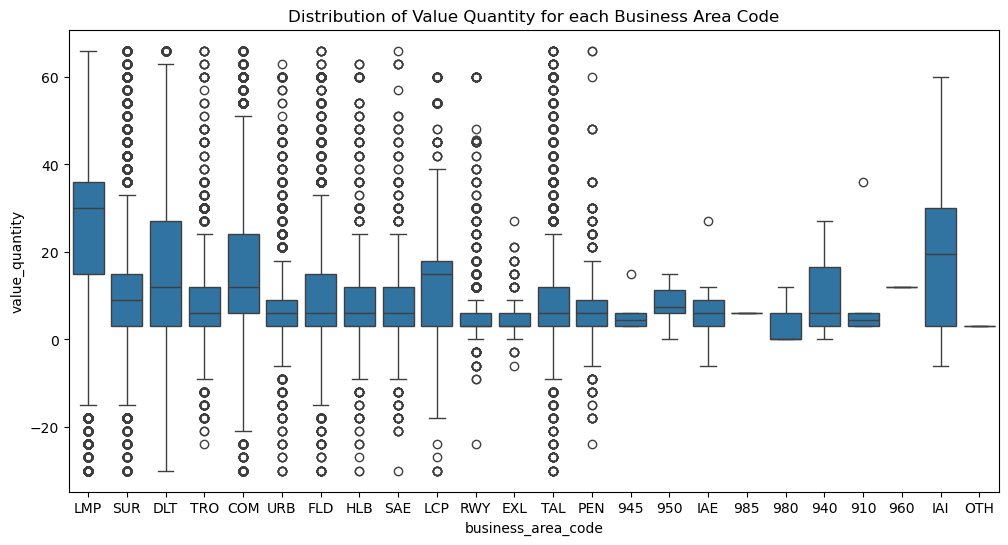

In [64]:
# Check the distribution of the 'value_quantity' column using boxplot for each 'business_area_code'
plt.figure(figsize=(12, 6))
sns.boxplot(x='business_area_code', y='value_quantity', data=df1_cleaned)
plt.title('Distribution of Value Quantity for each Business Area Code')
plt.show()

### 2. Dataset 2

#### [2.1] Exploring Data

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accounting_date           951177 non-null  int64  
 1   company_code              951158 non-null  float64
 2   customer_code             951168 non-null  object 
 3   customer_district_code    951172 non-null  float64
 4   item_code                 951172 non-null  object 
 5   business_area_code        951172 non-null  object 
 6   item_group_code           951171 non-null  object 
 7   item_class_code           951164 non-null  object 
 8   item_type                 951163 non-null  float64
 9   bonus_group_code          951164 non-null  object 
 10  environment_group_code    951150 non-null  object 
 11  technology_group_code     951162 non-null  object 
 12  commission_group_code     951162 non-null  object 
 13  reporting_classification  951164 non-null  o

In [68]:
# Find the number of unique values in each column
df2.nunique()

accounting_date               1329
company_code                     6
customer_code                 3915
customer_district_code          17
item_code                    23281
business_area_code              28
item_group_code                510
item_class_code                195
item_type                        9
bonus_group_code                 2
environment_group_code           9
technology_group_code          102
commission_group_code            3
reporting_classification         2
light_source                     3
warehouse_code                  29
abc_class_code                  10
abc_class_volume                10
business_chain_l1_code          47
business_chain_l1_name          42
contact_method_code           1274
salesperson_code               218
order_type_code                 32
market_segment                   1
value_sales                  81189
value_cost                  182251
value_quantity                1777
value_price_adjustment           2
currency            

#### [2.2] Checking Unique Values and Data Correction

In [70]:
# Convert non-string values to strings in object columns, then strip whitespace
df2 = df2.apply(lambda x: x.where(x.isna(), x.astype(str).str.strip()) if x.dtype == "object" else x)

In [71]:
# Check unique values in 'currency' column
df2['currency'].unique()

array(['AUD', 'AUS', 'NZD', 'USD', ''], dtype=object)

In [72]:
# Correct inconsistent currency names
corrections_currency = {'AUS': 'AUD', '': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'currency' column
df2['currency'] = df2['currency'].replace(corrections_currency)

In [73]:
# Check unique values in 'currency' column
df2['currency'].unique()

array(['AUD', 'NZD', 'USD', nan], dtype=object)

In [74]:
# Check unique values in 'business_area_code' column
df2['business_area_code'].unique()

array(['COM', 'OTH', 'SUR', 'LMP', nan, 'PEN', '940', 'TRO', 'DLT', 'TAL',
       '970', '999', '980', 'FLD', 'URB', 'IAE', '985', 'LCP', 'IAI',
       '920', 'SAE', 'EXL', 'HLB', '950', 'RWY', '945', '910', '960',
       '930'], dtype=object)

In [75]:
# Match some of the business area codes to existing codes
corrections_business = {'920': 'FLD', '930': 'RWY', '999': 'OTH', '970': 'LMP'}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'business_area_code' column
df2['business_area_code'] = df2['business_area_code'].replace(corrections_business)

In [76]:
# Check unique values in 'business_area_code' column
df2['business_area_code'].unique()

array(['COM', 'OTH', 'SUR', 'LMP', nan, 'PEN', '940', 'TRO', 'DLT', 'TAL',
       '980', 'FLD', 'URB', 'IAE', '985', 'LCP', 'IAI', 'SAE', 'EXL',
       'HLB', '950', 'RWY', '945', '910', '960'], dtype=object)

In [77]:
# Check unique values in 'environmental_group_code' column
df2['environment_group_code'].unique()

array([nan, 'C', 'P', 'S', 'R', 'Z', 'I', 'NA', 'M', 'D'], dtype=object)

In [78]:
# Convert 'NA' to NaN
corrections_environment = {'NA': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'environment_group_code' column
df2['environment_group_code'] = df2['environment_group_code'].replace(corrections_environment)

In [79]:
# Check unique values in 'environment_group_code' column
df2['environment_group_code'].unique()

array([nan, 'C', 'P', 'S', 'R', 'Z', 'I', 'M', 'D'], dtype=object)

In [80]:
# Check unique values in 'technology_group_code' column
df2['technology_group_code'].unique()

array([nan, 'CROM', 'NA', '220', '86', '76', '219', 'PIER', '78', '206',
       'SYLV', '68', '85', '198', '90', 'PNZ', '130', '96', '500', 'INZ',
       '61', '215', '360', '380', 'GLG', '100', 'CSE', '545', '225',
       '420', '217', '210', '320', '540', '460', '570', '565', '480',
       '580', '214', '830', '555', '330', '290', '280', '999', '760',
       '310', '400', '110', '560', '213', '160', '800', '440', '92',
       '600', '850', '70', 'SCHR', '102', '82', '300', '740', '181',
       '350', '520', '98', '415', '720', '340', '780', '108', '550',
       '240', 'FGDFT', '123', '595', '205', '64', 'AUST', '880', 'INLIT',
       '208', '118', '63', '211', '207', '72', '140', 'PHANT', 'DIGIN',
       '998', '250', '114', '112', '680', '128', '88', '640', '820',
       '410', '80'], dtype=object)

In [81]:
# Convert irrelevant codes to NaN
corrections_technology = {'NA': np.nan, '112': np.nan, 'DIGIN':np.nan, '114':np.nan,'PHANT':np.nan, '128':np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'technology_group_code' column
df2['technology_group_code'] = df2['technology_group_code'].replace(corrections_technology)

In [82]:
# Check unique values in 'technology_group_code' column
df2['technology_group_code'].unique()

array([nan, 'CROM', '220', '86', '76', '219', 'PIER', '78', '206', 'SYLV',
       '68', '85', '198', '90', 'PNZ', '130', '96', '500', 'INZ', '61',
       '215', '360', '380', 'GLG', '100', 'CSE', '545', '225', '420',
       '217', '210', '320', '540', '460', '570', '565', '480', '580',
       '214', '830', '555', '330', '290', '280', '999', '760', '310',
       '400', '110', '560', '213', '160', '800', '440', '92', '600',
       '850', '70', 'SCHR', '102', '82', '300', '740', '181', '350',
       '520', '98', '415', '720', '340', '780', '108', '550', '240',
       'FGDFT', '123', '595', '205', '64', 'AUST', '880', 'INLIT', '208',
       '118', '63', '211', '207', '72', '140', '998', '250', '680', '88',
       '640', '820', '410', '80'], dtype=object)

In [83]:
# Count each unique value in 'contact_method_code' column
df2['contact_method_code'].value_counts()

contact_method_code
NA     909034
FAX     18672
EDI      2838
UNK      1177
Z30       636
        ...  
LE1         1
PCN         1
TEA         1
WQE         1
SZA         1
Name: count, Length: 1274, dtype: int64

In [84]:
# Convert "NA" to NaN
df2['contact_method_code'] = df2['contact_method_code'].replace('NA', np.nan)

In [85]:
# Check unique values in 'warehouse_code' column
df2['warehouse_code'].unique()

array(['Unk', '5N2', '5S0', '5Q0', '5V0', '5W0', nan, '1N0', '1V0', '1Q0',
       '1N1', '1S0', '1Q1', '1W0', '1S1', '5T0', '5S1', 'FA1', 'FWE',
       'FA2', 'FW2', 'FWA', '5N1', '5Q1', '1T0', '1T1', 'EN0', 'BB1',
       '1N2', '1N3'], dtype=object)

In [86]:
# Convert 'Unk' to NaN
corrections_warehouse = {'Unk': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'warehouse_code' column
df2['warehouse_code'] = df2['warehouse_code'].replace(corrections_warehouse)

In [87]:
# Check unique values in 'warehouse_code' column
df2['warehouse_code'].unique()

array([nan, '5N2', '5S0', '5Q0', '5V0', '5W0', '1N0', '1V0', '1Q0', '1N1',
       '1S0', '1Q1', '1W0', '1S1', '5T0', '5S1', 'FA1', 'FWE', 'FA2',
       'FW2', 'FWA', '5N1', '5Q1', '1T0', '1T1', 'EN0', 'BB1', '1N2',
       '1N3'], dtype=object)

In [88]:
# Check unique values in 'customer_district_code' column
df2['customer_district_code'].unique()

array([400., 200., 510., 500., 310., 300., 410., 210., 600.,  nan, 720.,
       710., 535., 530., 540., 520., 545., 100.])

In [89]:
# There is no district code 100 in the metadata. We will replace this code with NaN.
# Convert irrelevant codes to NaN
df2['customer_district_code'] = df2['customer_district_code'].astype(str)
corrections_district = {'100': np.nan}
# In this case, '##error##' is replaced with NaN by using np.nan
# This is one of the functions in numpy library, to represent missing values.
# Apply the corrections to the 'customer_district_code' column
df2['customer_district_code'] = df2['customer_district_code'].replace(corrections_district)

In [90]:
# Check unique values in 'customer_district_code' column
df2['customer_district_code'].unique()

array(['400.0', '200.0', '510.0', '500.0', '310.0', '300.0', '410.0',
       '210.0', '600.0', 'nan', '720.0', '710.0', '535.0', '530.0',
       '540.0', '520.0', '545.0', '100.0'], dtype=object)

#### [2.3] Missing Values

In [92]:
# Find the number of missing values in each column
df2.isnull().sum()

accounting_date                  0
company_code                    19
customer_code                    9
customer_district_code           0
item_code                        5
business_area_code               5
item_group_code                  6
item_class_code                 13
item_type                       14
bonus_group_code                13
environment_group_code          55
technology_group_code        90382
commission_group_code           15
reporting_classification        13
light_source                     6
warehouse_code              119492
abc_class_code                  17
abc_class_volume                 5
business_chain_l1_code           6
business_chain_l1_name           6
contact_method_code         909039
salesperson_code                17
order_type_code                 16
market_segment                   4
value_sales                      0
value_cost                       0
value_quantity                   0
value_price_adjustment           0
currency            

**Comments:** There are two columns: 'item_source_class' and 'contact_method_code' that contain more than 50% missing values. We will drop these columns.

In [94]:
# Drop the 'item_source_class', 'contact_method_code' columns
df2.drop(columns=['item_source_class', 'contact_method_code'], inplace=True)

# Drop missing rows
df2.dropna(inplace=True)
print(df2.shape)

(808168, 32)


#### [2.4] Data Type Conversion

In [96]:
# Copy the value of currency into another column
df2['original_currency'] = df2['currency'].copy().astype(str)

# Currency conversion rates
conversion_rates = {'AUD': 1, 'USD': 0.65, 'NZD': 1.08}

# Convert all value_sale, value_cost to AUD based on the currency
df2['value_sales'] = df2['value_sales'] * df2['currency'].map(conversion_rates)
df2['value_cost'] = df2['value_cost'] * df2['currency'].map(conversion_rates)

# Change the currency to AUD
df2['currency'] = 'AUD'

In [97]:
# Check unique values after change the 'currency' column to 'AUD'
df2['currency'].unique()

array(['AUD'], dtype=object)

In [98]:
# Convert 'accounting_date' to day, month, and year columns
df2['accounting_date'] = pd.to_datetime(df2['accounting_date'], format='%Y%m%d', errors='coerce')

df2['accounting_day'] = df2['accounting_date'].dt.day
df2['accounting_month'] = df2['accounting_date'].dt.month
df2['accounting_year'] = df2['accounting_date'].dt.year

df2.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,value_price_adjustment,currency,invoice_number,line_number,customer_order_number,dss_update_time,original_currency,accounting_day,accounting_month,accounting_year
24,2023-02-08,205.0,471000815,400.0,10364,COM,COM03002,COM03,5.0,Trade,...,0,AUD,729543.0,0,829084,49:58.7,AUD,8,2,2023
26,2022-06-12,205.0,299480711,200.0,10364,COM,COM03002,COM03,5.0,Trade,...,0,AUD,756609.0,0,881053,49:58.7,AUD,12,6,2022
27,2021-03-15,205.0,500115010,500.0,11154,LMP,LMP04002,LMP04,5.0,Trade,...,0,AUD,737146.0,0,844941,49:58.7,AUD,15,3,2021
33,2020-01-17,205.0,412000003,400.0,11154,LMP,LMP04002,LMP04,5.0,Trade,...,0,AUD,725185.0,0,823519,49:58.7,AUD,17,1,2020
34,2023-04-19,205.0,474000500,410.0,11154,LMP,LMP04002,LMP04,5.0,Trade,...,0,AUD,288530.0,0,849091,49:58.7,AUD,19,4,2023


#### [2.5] Duplicates

In [100]:
duplicate_rows = df2.duplicated()
print("Number of duplicate rows",duplicate_rows.sum())

Number of duplicate rows 1148


In [101]:
# Drop duplicate rows
df2.drop_duplicates(inplace=True)
df2.shape

(807020, 36)

#### [2.6] Outliers

2.6.1: Visualise Outliers

Text(0, 0.5, 'Value Quantity')

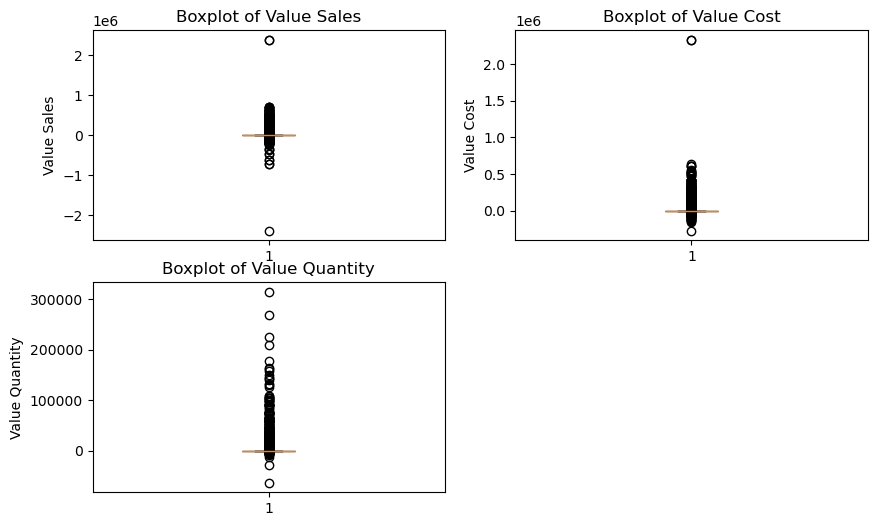

In [104]:
# Create boxplots to identify outliers
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
plt.boxplot(df2['value_sales'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Sales')
plt.ylabel('Value Sales')

plt.subplot(2, 2, 2)
plt.boxplot(df2['value_cost'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Cost')
plt.ylabel('Value Cost')

plt.subplot(2, 2, 3)
plt.boxplot(df2['value_quantity'].dropna(), patch_artist=True)
plt.title('Boxplot of Value Quantity')
plt.ylabel('Value Quantity')

2.6.2: Removing Outliers

In [106]:
def remove_outliers_iqr(df2, columns):
    df2_filtered = df2.copy()
    for col in columns:
        Q1 = df2_filtered[col].quantile(0.25)
        Q3 = df2_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep rows where col values are within the bounds
        df2_filtered = df2_filtered[(df2_filtered[col] >= lower_bound) & (df2_filtered[col] <= upper_bound)]
    return df2_filtered

# Columns to remove outliers from
cols = ['value_sales', 'value_cost', 'value_quantity']

# Remove outliers
df2_cleaned = remove_outliers_iqr(df2, cols)

# Check new shape
print(f"Original shape: {df2.shape}")
print(f"Shape after removing outliers: {df2_cleaned.shape}")

Original shape: (807020, 36)
Shape after removing outliers: (569345, 36)


2.6.3: Skewness

In [108]:
# Calculate skewness for each column after removing outliers
skewness_values = df2_cleaned[cols].skew()

print("Skewness of columns after outlier removal:")
print(skewness_values)

Skewness of columns after outlier removal:
value_sales       1.294881
value_cost        1.222688
value_quantity    1.083601
dtype: float64


In [109]:
print(df2_cleaned['value_sales'].min())
min_val = df2_cleaned['value_sales'].min()
shift = 0
if min_val <= 0:
    shift = abs(min_val) + 1  # add 1 to ensure positivity
    print(f"Shifting data by {shift} to make it positive")

value_sales_pos = df2_cleaned['value_sales'] + shift

df2_cleaned['value_sales_boxcox'], fitted_lambda = stats.boxcox(value_sales_pos)

print("Skewness after Box-Cox transform:", df2_cleaned['value_sales_boxcox'].skew())
print("Optimal lambda:", fitted_lambda)

-759.0
Shifting data by 760.0 to make it positive
Skewness after Box-Cox transform: 0.1778791470922194
Optimal lambda: 0.3241230917428033


In [110]:
print(df2_cleaned['value_cost'].min())
print(df2_cleaned['value_quantity'].min())

df2_cleaned['value_cost_log'] = np.log1p(df2_cleaned['value_cost'])
df2_cleaned['value_quantity_log'] = np.log1p(df2_cleaned['value_quantity'])

print("Skewness after log transform (value_cost):", df2_cleaned['value_cost_log'].skew())
print("Skewness after log transform (value_quantity):", df2_cleaned['value_quantity_log'].skew())

df2_cleaned['value_cost_sqrt'] = np.sqrt(df2_cleaned['value_cost'])
df2_cleaned['value_quantity_sqrt'] = np.sqrt(df2_cleaned['value_quantity'])

print("Skewness after sqrt transform (value_cost):", df2_cleaned['value_cost_sqrt'].skew())
print("Skewness after sqrt transform (value_quantity):", df2_cleaned['value_quantity_sqrt'].skew())

-226.26
-39.0
Skewness after log transform (value_cost): -0.7562105380068823
Skewness after log transform (value_quantity): -0.41174452902012576
Skewness after sqrt transform (value_cost): 0.5418039924236971
Skewness after sqrt transform (value_quantity): 0.3742521297826583


#### [2.7] Data Distribution

In [112]:
df2_cleaned.describe()

,accounting_date,company_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_number,line_number,accounting_day,accounting_month,accounting_year,value_sales_boxcox,value_cost_log,value_quantity_log,value_cost_sqrt,value_quantity_sqrt
count,569345,569345.000000,569345.000000,569345.000000,569345.000000,569345.000000,569345.000000,5.693450e+05,569345.000000,569345.000000,569345.000000,569345.000000,569345.000000,552875.000000,552732.000000,552737.000000,552732.000000
mean,2022-07-01 21:36:09.939843328,251.904336,6.393686,194.072752,90.739164,20.801484,0.030403,9.204222e+05,0.350243,15.508595,6.485781,2022.003441,25.265088,3.892175,2.685479,8.420282,4.143123
min,2020-01-02 00:00:00,101.000000,1.000000,-759.000000,-226.260000,-39.000000,0.000000,0.000000e+00,-64.000000,1.000000,1.000000,2020.000000,0.000000,-4.840893,0.000000,0.000000,0.000000
25%,2021-04-15 00:00:00,205.000000,6.000000,50.400000,17.832000,6.000000,0.000000,3.094620e+05,0.000000,8.000000,4.000000,2021.000000,23.958488,3.061792,1.945910,4.516902,2.449490
50%,2022-07-02 00:00:00,205.000000,7.000000,127.137600,53.910000,15.000000,0.000000,7.606750e+05,0.000000,15.000000,7.000000,2022.000000,24.763263,4.041939,2.772589,7.481978,3.872983
75%,2023-09-18 00:00:00,205.000000,7.000000,283.500000,134.969400,30.000000,0.000000,8.165530e+05,1.000000,23.000000,9.000000,2023.000000,26.267796,4.942642,3.433987,11.797034,5.477226
max,2024-12-31 00:00:00,950.000000,9.000000,1449.360000,437.041800,81.000000,1.000000,7.003023e+06,32.000000,31.000000,12.000000,2024.000000,34.346838,6.082314,4.406719,20.905545,9.000000
std,NaN,200.921704,1.477613,224.674802,104.275292,20.278214,0.171695,9.663055e+05,1.025951,8.566072,3.205883,1.414060,2.103267,1.366005,1.013838,4.984100,2.120798


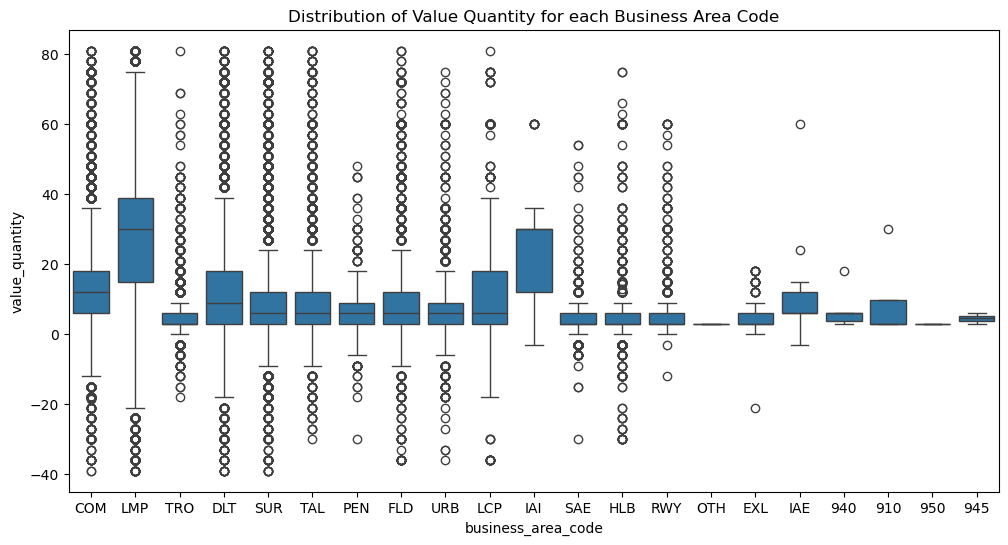

In [113]:
# Check the distribution of the 'value_quantity' column using boxplot for each 'business_area_code'
plt.figure(figsize=(12, 6))
sns.boxplot(x='business_area_code', y='value_quantity', data=df2_cleaned)
plt.title('Distribution of Value Quantity for each Business Area Code')
plt.show()

## Section 2: Exploratory Insights

In [115]:
# Concatenate two cleaned dataset into one dataset for analysis part 
df_combined = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)

### Section 2.1: Time-series trends

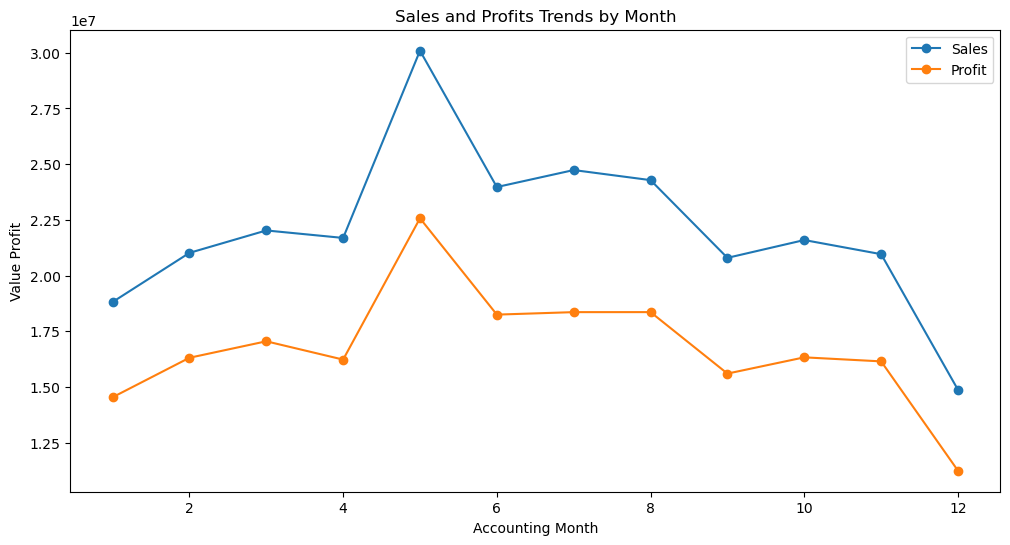

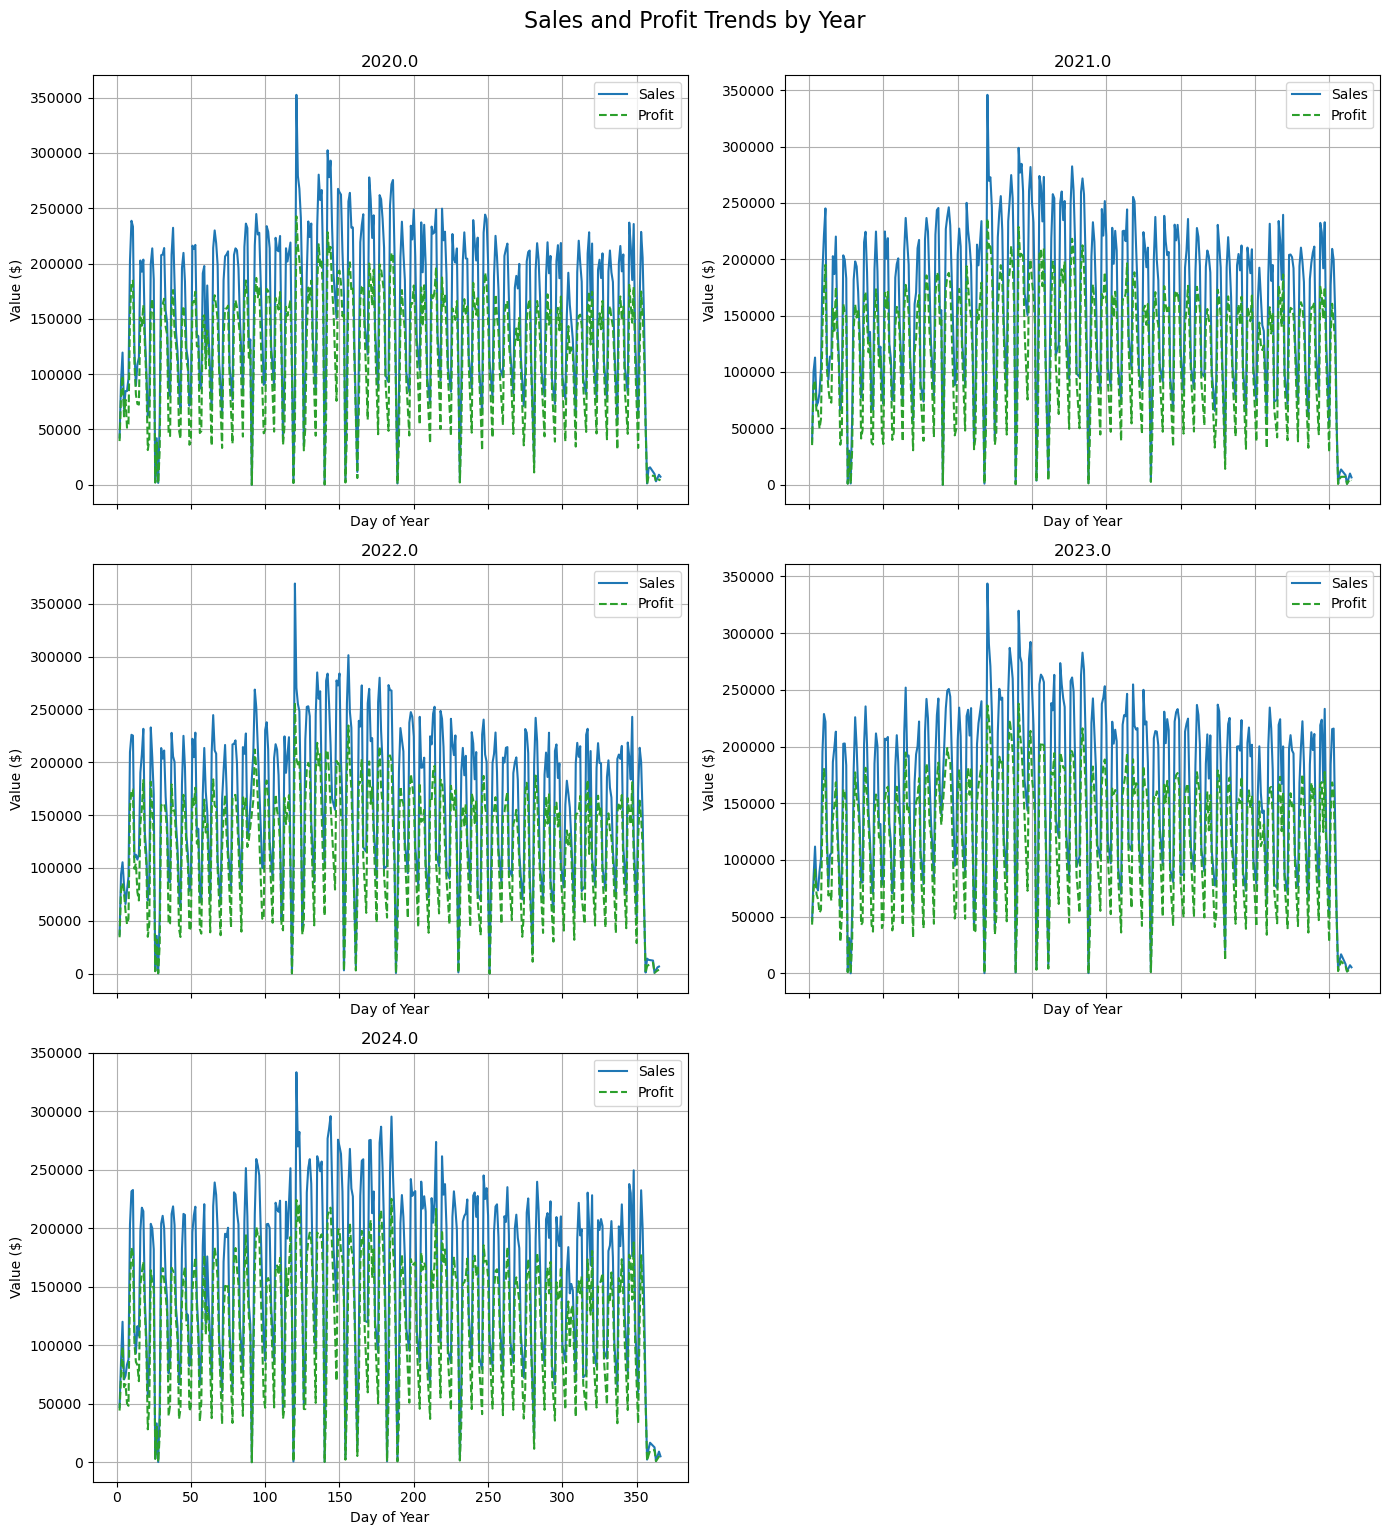

In [117]:
# Calculate value_profit
df_combined['value_profit'] = df_combined['value_sales'] - df_combined['value_cost']

# Group by accounting_month and sum sales & profit
monthly_trends = df_combined.groupby('accounting_month')[['value_sales', 'value_profit']].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_trends['accounting_month'], monthly_trends['value_sales'], marker='o', label='Sales')
plt.plot(monthly_trends['accounting_month'], monthly_trends['value_profit'], marker='o', label='Profit')
plt.xlabel('Accounting Month')
plt.ylabel('Value Profit')
plt.title('Sales and Profits Trends by Month')
plt.legend()

# Ensure date is in datetime format
df_combined['accounting_date'] = pd.to_datetime(df_combined['accounting_date'])

# Calculate profit
df_combined['value_profit'] = df_combined['value_sales'] - df_combined['value_cost']

# Extract year and day-of-year
df_combined['year'] = df_combined['accounting_date'].dt.year
df_combined['day'] = df_combined['accounting_date'].dt.dayofyear

# Group by year and day
trend_by_year = df_combined.groupby(['year', 'day'])[['value_sales', 'value_profit']].sum().reset_index()

# Prepare grid
years = sorted(trend_by_year['year'].unique())
n_years = len(years)
cols = 2
rows = (n_years + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharex=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each year in its own subplot
for i, yr in enumerate(years):
    ax = axes[i]
    subset = trend_by_year[trend_by_year['year'] == yr]
    ax.plot(subset['day'], subset['value_sales'], label='Sales', color='tab:blue')
    ax.plot(subset['day'], subset['value_profit'], label='Profit', color='tab:green', linestyle='--')
    ax.set_title(f'{yr}')
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Value ($)')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Sales and Profit Trends by Year', fontsize=16, y=1.02)
plt.show()

## Sales Performance Trend Analysis

### Yearly Trends (2020–2024)

Sales and profit show a clear weekly pattern every year, with noticeable ups and downs. This suggests that customer purchases follow a regular cycle, possibly based on business routines or retail demand.

In **2020** and **2022**, sales were more unpredictable, with some extreme spikes and drops. This may have been caused by external factors like supply chain issues or market disruptions. In contrast, **2021** and **2023** were more stable, showing consistent performance throughout the year.

At the end of every year, especially in **December**, both sales and profit drop sharply. This is likely due to the holiday season when business activity slows down.

---

### Monthly Trends

Monthly data shows that **May is the strongest month for sales and profit**. This peak could be the result of seasonal promotions, bulk orders, or annual contracts.

After May, sales start to slowly decline for the rest of the year. Profits also follow a similar trend but remain more stable. The lowest performance is seen in **December**, matching the year-end slowdown noted in the daily data.

---

### Key Takeaways

- Sales follow a regular weekly pattern across all years.
- **May** is the best-performing month, suggesting a seasonal opportunity.
- **December** consistently sees a drop in performance.
- Profit levels track closely with sales, indicating consistent margins.

These trends can help guide future sales planning, seasonal campaigns, and resource management.


### Section 2.2: Top Selling Products by Year

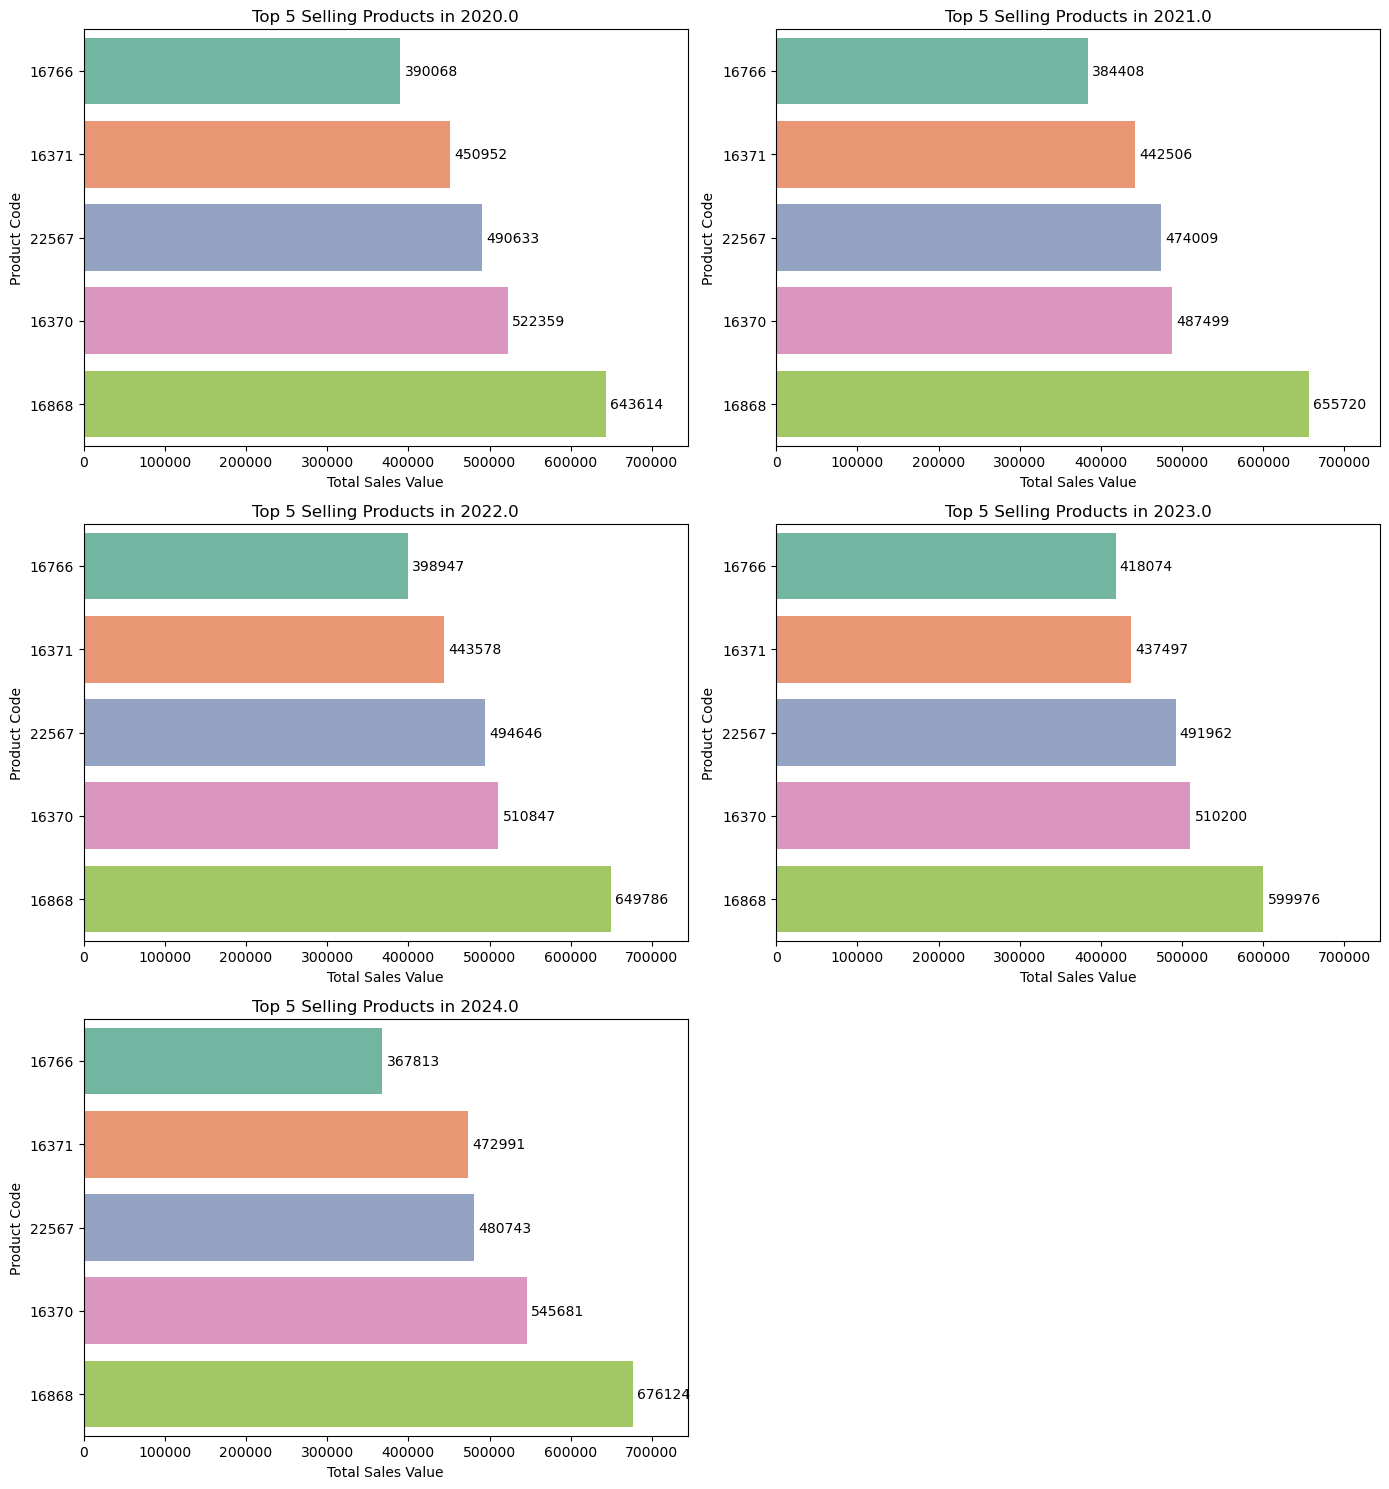

In [120]:
# Group the data
grouped = df_combined.groupby(['accounting_year', 'item_code'])['value_sales'].sum().reset_index()
years = sorted(grouped['accounting_year'].unique())

# Calculate layout
n_years = len(years)
ncols = 2
nrows = math.ceil(n_years / ncols)

# Set up subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 5))
axes = axes.flatten()

# Get global max for consistent x-limits
max_val = grouped['value_sales'].max()

# Plot each year
for idx, year in enumerate(years):
    ax = axes[idx]
    year_data = grouped[grouped['accounting_year'] == year]
    top5 = year_data.sort_values('value_sales', ascending=False).head(5)

    sns.barplot(
        data=top5,
        x='value_sales',
        y='item_code',
        ax=ax,
        palette=sns.color_palette("Set2"),
        order=top5.sort_values('value_sales', ascending=True)['item_code']
    )

    # Add labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

    ax.set_title(f"Top 5 Selling Products in {year}")
    ax.set_xlabel("Total Sales Value")
    ax.set_ylabel("Product Code")
    ax.set_xlim(0, max_val * 1.1)

# Turn off any unused subplots
for i in range(len(years), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### Section 2.3: Sales Trend by District

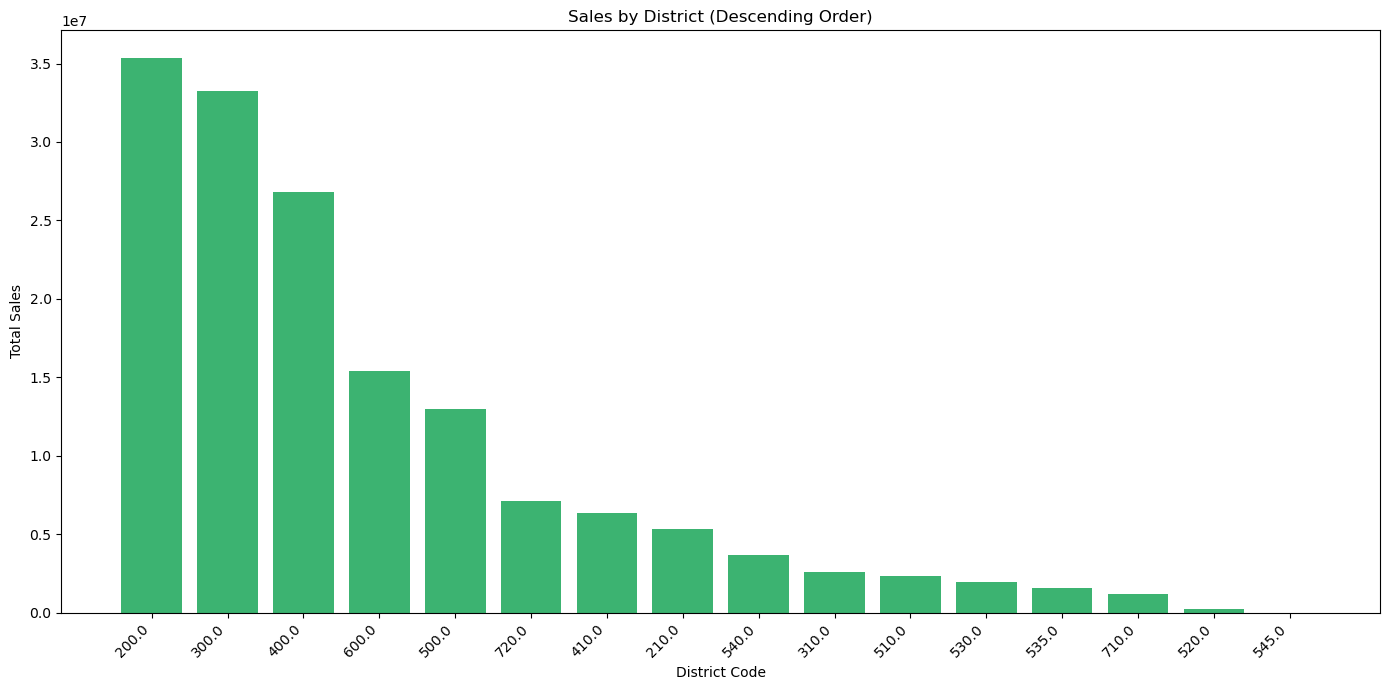

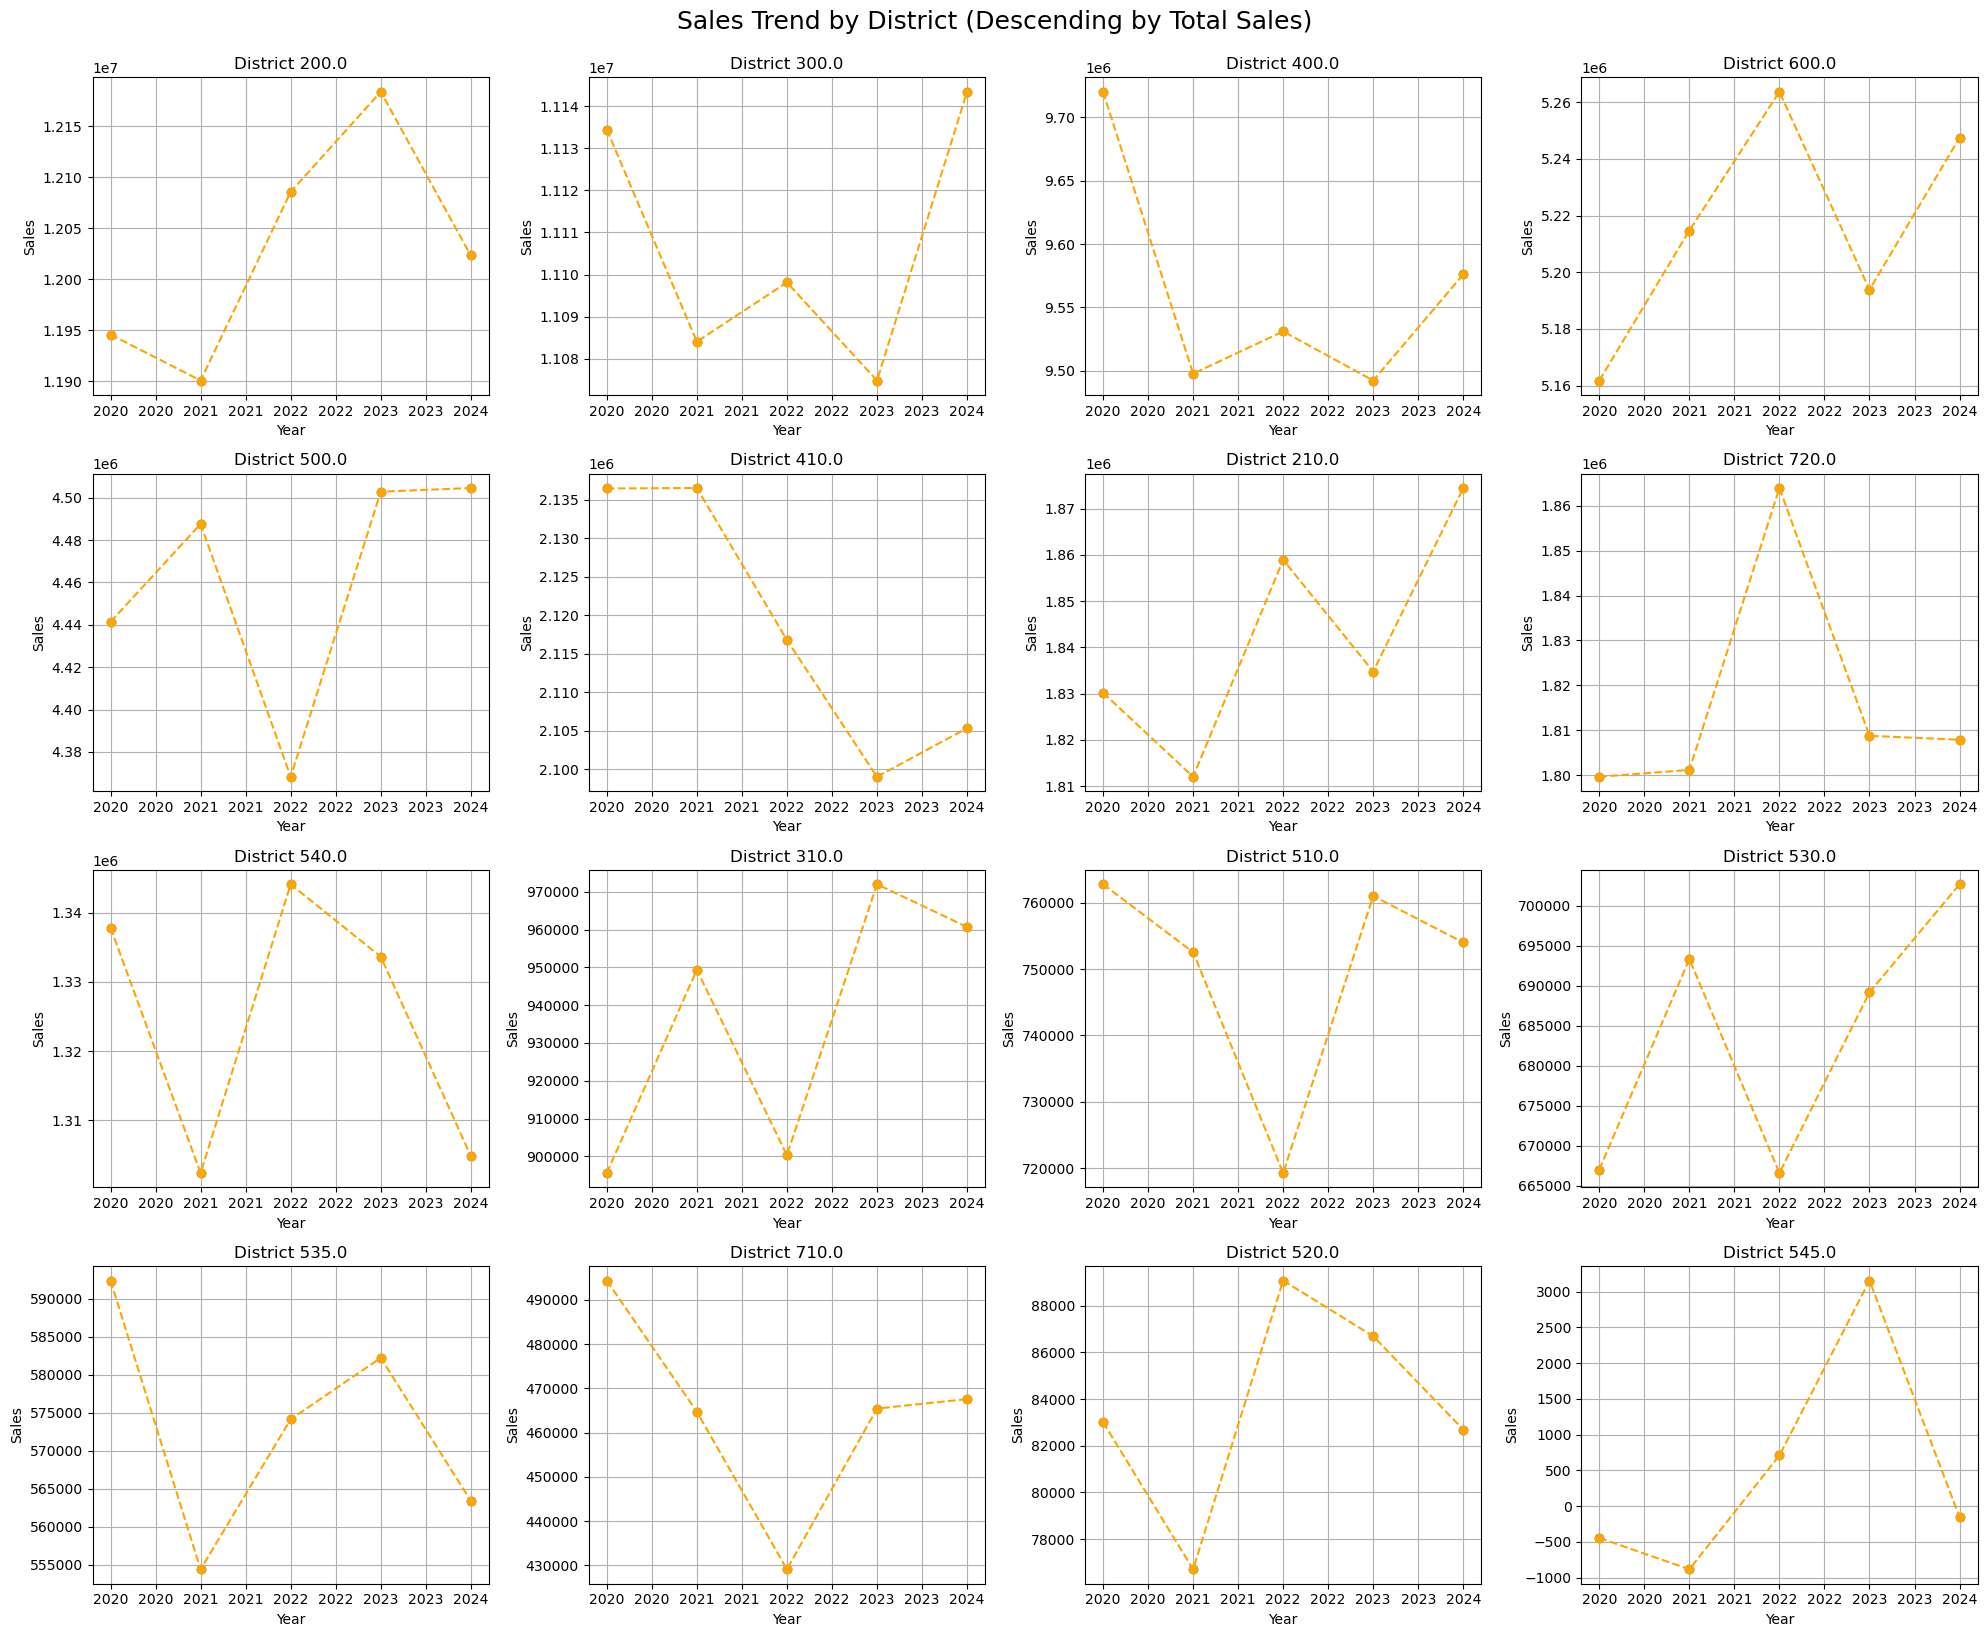

In [122]:
# Group by district, sum sales
district_sales = df_combined.groupby('customer_district_code')['value_sales'].sum().reset_index()

# Sort districts by sales
district_sales = district_sales.sort_values('value_sales', ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(district_sales['customer_district_code'].astype(str), district_sales['value_sales'], color='mediumseagreen')
plt.xlabel('District Code')
plt.ylabel('Total Sales')
plt.title('Sales by District (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ensure correct types
df_combined['accounting_year'] = pd.to_numeric(df_combined['accounting_year'], errors='coerce')
df_combined['value_sales'] = pd.to_numeric(df_combined['value_sales'], errors='coerce')
df_combined['customer_district_code'] = df_combined['customer_district_code'].astype(str)

# Group by district and year
trend = df_combined.groupby(['customer_district_code', 'accounting_year'])['value_sales'].sum().reset_index()

# Compute total sales per district and sort ascending
total_sales = trend.groupby('customer_district_code')['value_sales'].sum().sort_values(ascending=False)
districts = total_sales.index.tolist()  # Ordered list of districts

# Plot layout
n_districts = len(districts)
ncols = 4
nrows = (n_districts + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axes = axes.flatten()

# Plot each district
for idx, district in enumerate(districts):
    ax = axes[idx]
    ddata = trend[trend['customer_district_code'] == district]
    ax.scatter(ddata['accounting_year'], ddata['value_sales'], color='tab:blue')
    ax.plot(ddata['accounting_year'], ddata['value_sales'], linestyle='--', marker='o', color='orange')
    ax.set_title(f'District {district}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.grid(True)

    # Format x-axis to remove decimal from year
    from matplotlib.ticker import FuncFormatter
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# Turn off extra axes
for i in range(len(districts), len(axes)):
    axes[i].axis('off')

# Final layout
plt.tight_layout()
plt.suptitle('Sales Trend by District (Descending by Total Sales)', y=1.02, fontsize=18)
plt.show()


### Section 2.4: Is the average order quantity for all orders significantly higher than 30 units?

**Null Hypothesis (Ho):** The average order quantity is less than or equal to 30 units.

**Alternative Hypothesis (Ha):** The average order quantity is greater than 30 units.0


Mean Order Quantity: 19.73
Benchmark: 30
T-statistic: -599.0325
One-tailed P-value: 1.0
The average order quantity is not significantly greater than 30 units.


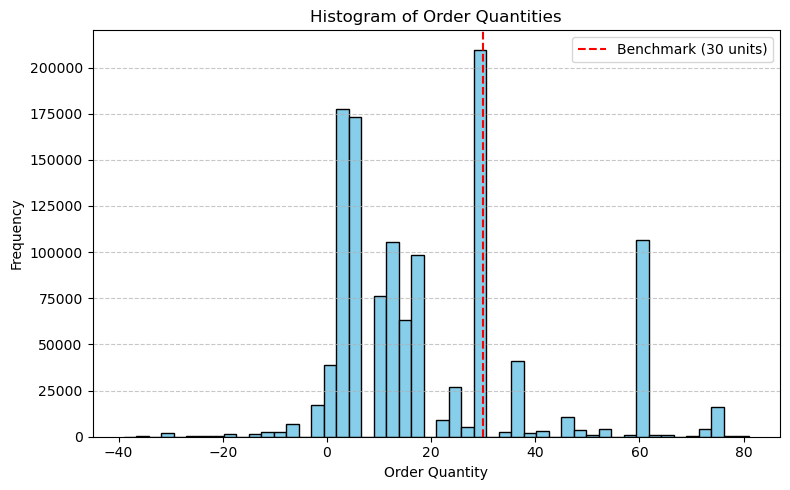

In [124]:
# Determine data using for testing
quantity_data = df_combined['value_quantity']

# Setting benchmark
benchmark_quantity = 30

# One-sample t-test
t_stat, p_val_two_tailed = ttest_1samp(quantity_data, popmean=benchmark_quantity)

# Converting to one-tailed p-value (greater than test)
if t_stat > 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

# Displaying results
print("Mean Order Quantity:", round(quantity_data.mean(), 2))
print("Benchmark:", benchmark_quantity)
print("T-statistic:", round(t_stat, 4))
print("One-tailed P-value:", round(p_val_one_tailed, 4))

# Interpretation:
alpha = 0.05
if p_val_one_tailed < alpha:
    print("The average order quantity is significantly greater than 30 units.")
else:
    print("The average order quantity is not significantly greater than 30 units.")

# Histogram:
plt.figure(figsize=(8, 5))
plt.hist(quantity_data, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Order Quantities")
plt.xlabel("Order Quantity")
plt.ylabel("Frequency")
plt.axvline(30, color='red', linestyle='dashed', linewidth=1.5, label="Benchmark (30 units)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Interpretation:
The average order quantity (21.28 units) is significantly less than 30.
- The t-statistic is extremely negative (-506.62) and the p-value is 1, confirming no statistical evidence that the average order quantity is greater than 30 units.
- The histogram shows a strong peak around 30 units, but the majority of orders fall below it, skewing the overall average downward.

Although a distinct peak is observed at 30 units, the one-sample t-test reveals that the overall average order quantity of 21.28 units is significantly below this benchmark. This suggests that while some customers regularly order in bulk, the general trend remains tilted toward smaller orders. Targeted interventions may be required to shift customer behavior closer to the desired operational threshold.

### Section 2.5: Are the value_sales diffent from different groups of currencies?

**Null Hypothesis (Ho):** There are no differences value sales between groups of currencies.

**Null Alternative (Ha):** There are differences value sales between groups of currencies.

In [128]:
# Filter to required columns and simulate full currency groups for testing
df_anova = df_combined.dropna(subset=['value_sales', 'original_currency'])

# Run ANOVA Test
model = ols('value_sales ~ C(original_currency)', data=df_anova).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)

                            sum_sq         df          F        PR(>F)
C(original_currency)  1.884261e+07        3.0  85.889036  1.456510e-55
Residual              8.910520e+10  1218487.0        NaN           NaN


#### Insights:
**A one-way ANOVA** was performed to examine whether the mean value_sales significantly varies across four original_currency groups: AUD (domestic), USD, NZD, and EUR (international). The results indicate a statistically significant difference in mean sales across these currency categories (F = 85.89, p < 0.0001), leading to the rejection of the null hypothesis. This confirms that the currency of transaction, which often corresponds to the customer's region—has a substantial effect on sales performance.

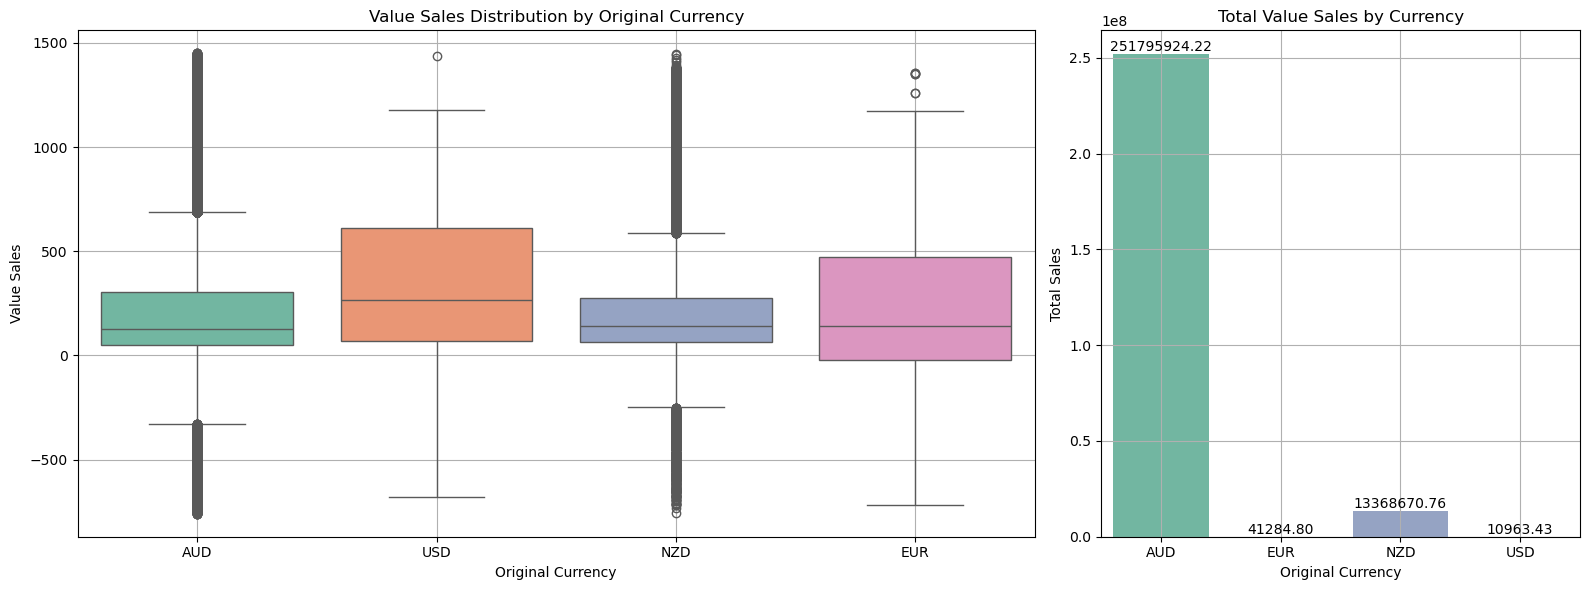

In [130]:
# Prepare total sales data
total_sales_by_currency = df_combined.groupby('original_currency')['value_sales'].sum().reset_index()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Boxplot
sns.boxplot(data=df_combined, x='original_currency', y='value_sales', palette='Set2', ax=ax1)
ax1.set_title('Value Sales Distribution by Original Currency')
ax1.set_xlabel('Original Currency')
ax1.set_ylabel('Value Sales')
ax1.grid(True)

# Barplot with value labels
sns.barplot(data=total_sales_by_currency, x='original_currency', y='value_sales', palette='Set2', ax=ax2)
ax2.set_title('Total Value Sales by Currency')
ax2.set_xlabel('Original Currency')
ax2.set_ylabel('Total Sales')
ax2.grid(True)

# Add data labels on top of bars
for index, row in total_sales_by_currency.iterrows():
    ax2.text(x=index, y=row['value_sales'], s=f"{row['value_sales']:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Insights:
- **USD and EUR** currencies are linked to higher median transaction values and greater variability, suggesting that international customers tend to place larger or more complex orders. The presence of extreme outliers—especially in EUR—likely reflects occasional large-volume deals or high-ticket projects, indicative of premium clients or bespoke solutions.
  
- **AUD**, as the domestic currency, contributes the majority of total sales volume, reflecting a well-established local customer base. While sales are generally stable and consistent, the lower average transaction value suggests a focus on smaller, frequent purchases, likely driven by standardised products or local pricing expectations. Importantly, AUD transactions also show a non-trivial number of negative sales entries, highlighting issues related to returns, adjustments, or credit notes. This presents not only an opportunity to optimise value per transaction (through bundling or upselling) but also a need to improve return handling and after-sales processes.

- **NZD**  transactions display high volatility and a wide range of values, including frequent negative and extreme values. This pattern suggests inconsistencies in pricing, customer behaviour, or fulfilment quality. Although NZD contributes more total sales than USD or EUR, the inconsistency indicates a need to stabilise performance through customer segmentation, discount policy review, or transactional controls.

#### Insights on Current Sales Strategy
The company is **heavily focused on the Australian market**, which drives most of its sales through frequent, lower-value transactions. **USD and EUR markets are underutilised**, despite showing higher sales per transaction, indicating untapped potential. **NZD sales are unstable**, with signs of frequent returns and pricing inconsistencies, suggesting the need for tighter control in that region.

## Section 3:  Test Sub Sample Differences

### Section 3.1: Is there a significant difference in the average profit margin between Class A and Class B products?
**Two Sample t- test 1: Profit Margin – ABC Class code A vs B**

**Null Hypothesis (Ho):** There is no significant difference in average profit margin between Class A and Class B products.
(Mean_A = Mean_B)

**Alternative Hypothesis (Ha):** There is a significant difference in average profit margin between Class A and B.
(Mean_A ≠ Mean_B)


Class A Mean Profit Margin: 0.6822
Class B Mean Profit Margin: 0.6602
T-statistic: 6.4178
P-value: 0.0
Sample Sizes: A = 10000 , B = 10000
There is a significant difference in average profit margin between Class A and B products.


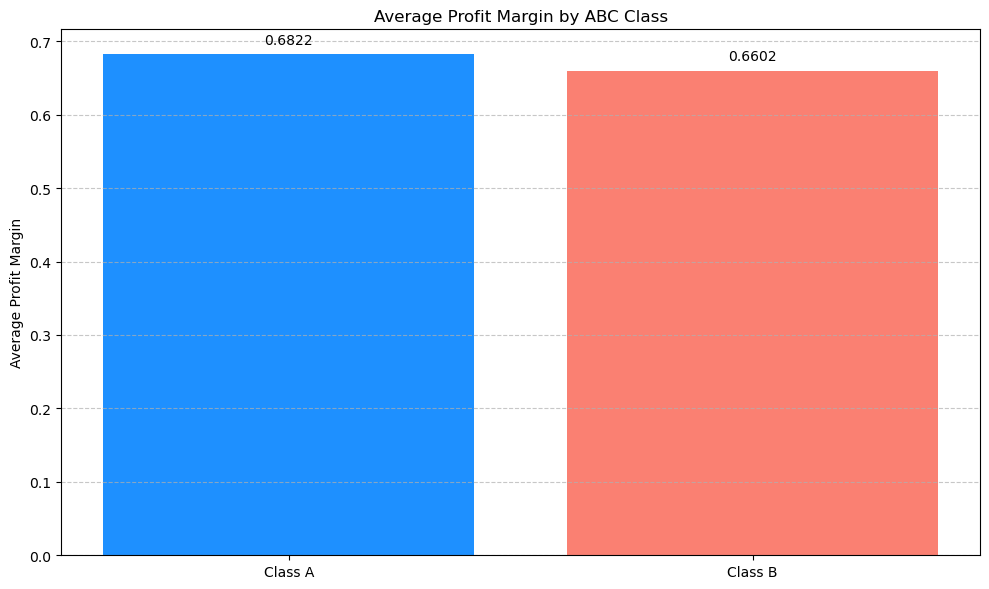

In [135]:
# Filtering required columns
df_filtered = df_combined[['abc_class_code', 'value_sales', 'value_cost']]
df_filtered = df_filtered[df_filtered['value_sales'] > 0]

# Calculating profit margin
df_filtered['profit_margin'] = (df_filtered['value_sales'] - df_filtered['value_cost']) / df_filtered['value_sales']

# Taking Sample of 10,000 rows from each class
sample_a = df_filtered[df_filtered['abc_class_code'] == 'A'].sample(n=10000, random_state=42)
sample_b = df_filtered[df_filtered['abc_class_code'] == 'B'].sample(n=10000, random_state=42)

# Two-sample t-test (Welch's test)
t_stat, p_val = ttest_ind(sample_a['profit_margin'], sample_b['profit_margin'], equal_var=False)

# Displaying results
print("Class A Mean Profit Margin:", round(sample_a['profit_margin'].mean(), 4))
print("Class B Mean Profit Margin:", round(sample_b['profit_margin'].mean(), 4))
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))
print("Sample Sizes: A =", len(sample_a), ", B =", len(sample_b))

# Interpretation:
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference in average profit margin between Class A and B products.")
else:
    print("There is no significant difference in average profit margin between Class A and B products.")

# Calculating means
mean_a = sample_a['profit_margin'].mean()
mean_b = sample_b['profit_margin'].mean()

# Bar chart
classes = ['Class A', 'Class B']
means = [mean_a, mean_b]

plt.figure(figsize=(10, 6))
bars = plt.bar(classes, means, color=['dodgerblue', 'salmon'])
plt.title("Average Profit Margin by ABC Class")
plt.ylabel("Average Profit Margin")

# Adding labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.4f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Interpretation:
- **The average profit margin for Class A products** (0.6822) is **significantly higher** than that of **Class B** products (0.6602). A two-sample t-test produced a T-statistic of 6.4178 and a p-value of 0.0, indicating a statistically significant difference in profitability between the two product classes.
- Despite the numerical difference appearing small (~2.2 percentage points), the result is meaningful due to the large sample sizes (10,000 for each class), which provide strong statistical power. This confirms that Class A products not only lead in sales volume or prioritization but also generate greater profit per unit sold.

The bar chart clearly illustrates the margin gap, visually reinforcing the statistical result. This insight supports the continued emphasis on Class A products for strategic pricing, promotional targeting, and inventory prioritisation, making them a key focus for profitability-driven decision-making.

### Section 3.2: Do customers from different district codes have different average order quantities?

**Null Hypothesis (Ho)**: No difference in average quantity ordered between customer_district_code 200 and district customer_district_code 300

**Alternative Hypothesis (Ha)**: There is a significant difference between district customer_district_coe  200 and district customer_district_code 300


#### Why 200 and 300? 
Top 2 customer_district_code with the most data to avoid small sample bias.

customer_district_code
200.0    271019
300.0    238332
400.0    222552
500.0    110760
600.0     91405
210.0     42527
410.0     39525
540.0     31562
720.0     27988
310.0     18122
530.0     15505
535.0     13254
510.0     11389
710.0      7292
520.0      2769
545.0         5
Name: count, dtype: int64
District 200 sample size: 271019
District 300 sample size: 238332
T-statistic: 30.538
P-value: 0.0
There is a significant difference in average order quantity between districts 200 and 300.


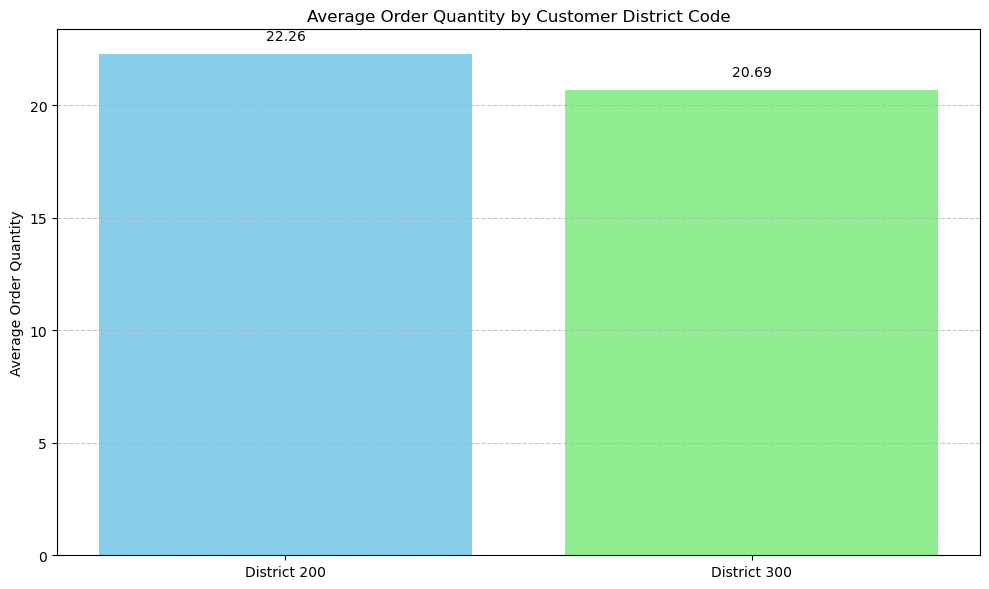

In [139]:
# Keeping only relevant columns and cleaning the data
df_filtered2 = df_combined[['customer_district_code', 'value_quantity']]
df_filtered2 = df_filtered2[df_filtered2['value_quantity'] > 0]
district_counts = df_filtered2['customer_district_code'].value_counts()
print(district_counts)

# Use string comparison for district codes

district_200 = df_filtered2[df_filtered2['customer_district_code'] == '200.0']['value_quantity']
district_300 = df_filtered2[df_filtered2['customer_district_code'] == '300.0']['value_quantity']

# Printing sample sizes
print(f"District 200 sample size: {len(district_200)}")
print(f"District 300 sample size: {len(district_300)}")

# Two-sample t-test (Welch's test, does not assume equal variances)
t_stat, p_val = ttest_ind(district_200, district_300, equal_var=False)

# Displaying results
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))

# Interpretation:
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference in average order quantity between districts 200 and 300.")
else:
    print("There is no significant difference in average order quantity between districts 200 and 300.")

# Calculating mean quantities
mean_200 = district_200.mean()
mean_300 = district_300.mean()

# Bar chart data
districts = ['District 200', 'District 300']
means = [mean_200, mean_300]

# Creating bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(districts, means, color=['skyblue', 'lightgreen'])
plt.title("Average Order Quantity by Customer District Code")
plt.ylabel("Average Order Quantity")

# Adding value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Interpretation:
The **average order quantity in district 200** (22.26 units) is **significantly higher** than in **district 300** (20.69 units). The two-sample t-test returned a T-statistic of 30.538 and a p-value of 0.0, indicating a statistically significant difference in order size between the two regions.

Despite the small numeric gap (~1.57 units), the test result is meaningful due to the very large sample sizes (271,019 for district 200 and 238,332 for district 300). This confirms a consistent pattern in ordering behavior across regions.

The bar chart highlights this difference visually, suggesting that customers in district 200 tend to place larger orders. This information is valuable for regional demand forecasting, warehouse distribution planning, and targeted promotional efforts, helping management better align operational strategy with geographic trends.

### Section 3.3: Do different warehouse locations result in different average sales values?

**Null Hypothesis (Ho)**: The average sales from warehouse_code 5N2 and warehouse_code CN0 are equal.

**Alternative Hypothesis (Ha)**: The average sales from warehouse_code 5N2 and warehouse_code CN0 are significantly different.

warehouse_code
5N2    427537
CN0    158676
5S0     60026
5W0     54596
5V0     52845
5Q0     51463
FA1     46117
1N1     24439
5N1     19600
V0      17819
CS0     17790
CW0     17587
LN9     16438
1V0     14263
1N0     13669
N0      12973
1Q0     12018
FWE     10565
LV0     10541
Q0       9360
LQ0      8839
1W0      7454
KN0      7424
S0       6885
CQ0      6541
W0       6256
5Q1      3812
1S0      3788
LW0      3505
Q1       3366
5S1      3273
CV0      3025
FW2      2003
5T0      1769
T0       1611
S1       1597
FA2      1535
1Q1      1484
LS0      1028
1S1       965
GN0       853
FWA       735
CN1       465
1T0       303
CS1       286
LS1       242
EN0        93
1T1        48
GW0        23
CZ0        18
BB1         5
GS0         4
AS0         3
1N2         1
Name: count, dtype: int64
Warehouse 5N2 sample size: 427537
Warehouse CN0 sample size: 158676
T-statistic: -8.3984
P-value: 0.0
There is a significant difference in average sales between warehouse 5N2 and CN0.


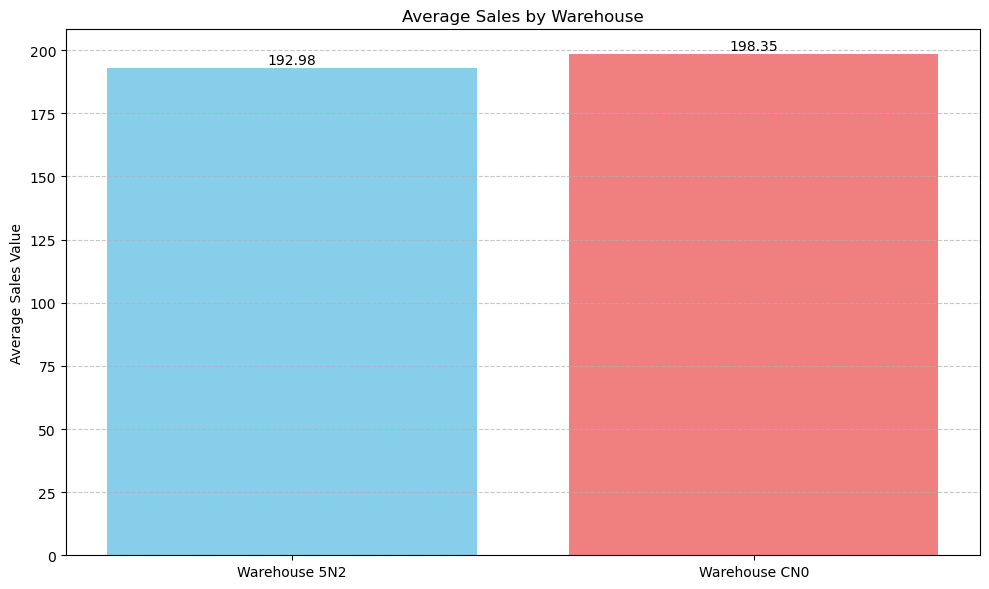

In [142]:
# Dropping missing or zero sales
df_filtered = df_combined[['warehouse_code', 'value_sales']]
df_filtered = df_filtered[df_filtered['value_sales'] > 0]

# Counting how many records each warehouse has
warehouse_counts = df_filtered['warehouse_code'].value_counts()
print(warehouse_counts)

# Filtering only warehouse codes 5N2 and CN0
sales_5N2 = df_filtered[df_filtered['warehouse_code'] == '5N2']['value_sales']
sales_CN0 = df_filtered[df_filtered['warehouse_code'] == 'CN0']['value_sales']

# Printing sample sizes
print(f"Warehouse 5N2 sample size: {len(sales_5N2)}")
print(f"Warehouse CN0 sample size: {len(sales_CN0)}")

# Two-sample t-test (Welch's t-test)
t_stat, p_val = ttest_ind(sales_5N2, sales_CN0, equal_var=False)

# Displaying the results
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))

# Interpretation:
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference in average sales between warehouse 5N2 and CN0.")
else:
    print("There is no significant difference in average sales between warehouse 5N2 and CN0.")

# Calculating mean sales
mean_5N2 = sales_5N2.mean()
mean_CN0 = sales_CN0.mean()

# Bar chart data
warehouses = ['Warehouse 5N2', 'Warehouse CN0']
means = [mean_5N2, mean_CN0]

# Creating bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(warehouses, means, color=['skyblue', 'lightcoral'])
plt.title("Average Sales by Warehouse")
plt.ylabel("Average Sales Value")

# Adding value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Interpretation:
The **average sales value from Warehouse CN0** (198.35 units) is **significantly higher** than that of **Warehouse 5N2** (192.96 units). The two-sample t-test produced a t-statistic of -8.3984 and a p-value of 0.0, indicating a statistically significant difference in average sales between the two warehouses.

This result confirms that the sales performance between the two locations is not equal, even though the numeric difference may seem small (~5.4 units). The large sample sizes — 427,537 for 5N2 and 158,676 for CN0 — give the test strong power to detect even subtle variations.

Although both warehouses process high volumes, the consistent difference in average sales per transaction suggests that Warehouse CN0 may be serving higher-value orders or operating more efficiently. This could be influenced by regional demand, customer segmentation, or stocking strategies.

The bar chart supports this finding, visually showing the higher average sales at CN0. This insight may warrant further analysis into warehouse-specific factors, and can inform decisions on resource allocation, performance benchmarking, or operational improvements to bring Warehouse 5N2 in line with CN0’s performance.

## Section 4: Inference

### Section 4.1: What drives total sales performance?


                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:48:32   Log-Likelihood:            -8.5187e+06
No. Observations:             1218491   AIC:                         1.704e+07
Df Residuals:                 1218485   BIC:                         1.704e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.1743      0.358    564.579      0.0

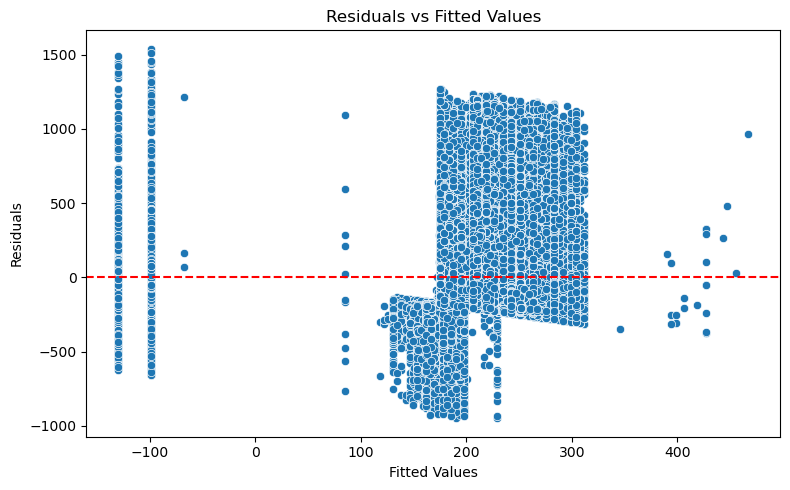

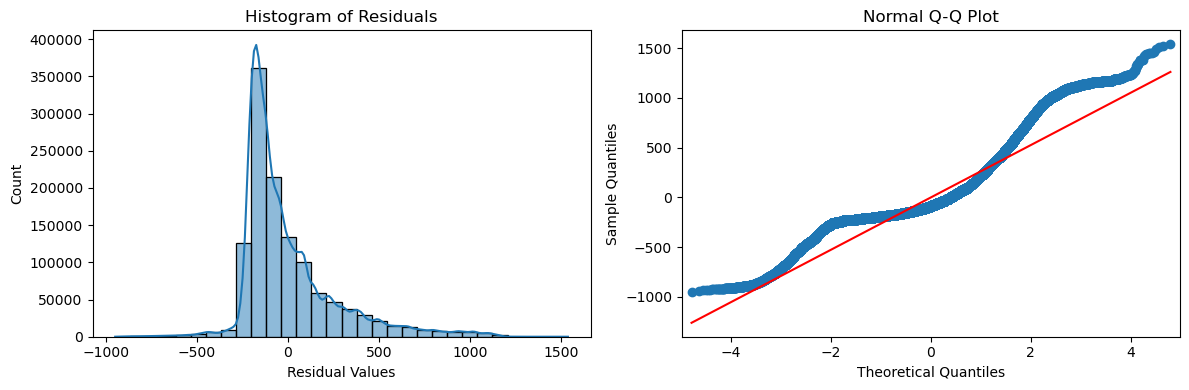

Shapiro-Wilk Test: ShapiroResult(statistic=0.7483605539430955, pvalue=5.252366783493813e-66)


In [146]:
# Select variables
target = 'value_sales'
features = ['value_quantity', 'value_price_adjustment', 'original_currency']

# Ensure currency is treated as string for encoding
df_combined['original_currency'] = df_combined['original_currency'].astype(str)

# Define preprocessing: numerical + categorical (with one-hot encoding)
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), ['value_quantity', 'value_price_adjustment']),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['original_currency'])  # drop one as baseline
])

# Transform features
X = preprocessor.fit_transform(df_combined[features])
y = df_combined[target]

# Add intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Calculate VIF (optional)
vif_data = pd.DataFrame()
vif_data['feature'] = ['const'] + preprocessor.get_feature_names_out().tolist()
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print results
print(model.summary())
print(vif_data)

# Residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# 1. Residuals vs Fitted Plot (Linearity & Homoscedasticity)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

# 2. Histogram & Q-Q Plot (Normality)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(residuals, ax=axes[0], kde=True, bins=30)
axes[0].set_xlabel('Residual Values')
axes[0].set_title('Histogram of Residuals')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

# 3. Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals[:5000])
print("Shapiro-Wilk Test:", shapiro_test)

#### Interpretation
**1. Quantity Drives Sales**

An increase in the number of units sold (value_quantity) is strongly associated with higher sales. For each additional unit sold, sales increase by approximately $1.35, confirming that volume is a primary driver of revenue.

**2. Price Adjustments Reduce Sales**

The variable value_price_adjustment has a large and statistically significant negative effect on value_sales. On average, each additional unit of price reduction (e.g., discounts or markdowns) is linked to a ~$301 drop in revenue, reinforcing the trade-off between promotional pricing and profit margins.

**3. Currency Matters — Region Shapes Sales Outcomes**

Although AUD serves as the baseline in the regression model, significant differences emerge among other currency groups:
- USD transactions are associated with about 184 dollars higher sales per transaction than AUD, even after controlling for quantity and discounting. This indicates that USD customers may represent higher-value segments or larger order volumes, making them a strategic opportunity for premium offerings or expanded market engagement.
- NZD transactions are associated with 31 dollars lower sales value compared to AUD. This underperformance could be due to smaller average order sizes, greater use of discounts, or market-specific inefficiencies.
- EUR transactions display higher variability in sales (as seen in the ANOVA boxplot), but are not statistically different from AUD when controlling for other factors. This suggests that their impact may be driven more by sales volume than currency-specific behaviour.

However, **the model’s explanatory power is limited (R² = 0.054)**, suggesting that other factors — such as customer type, product group, or seasonality — likely play a significant role in shaping value_sales.

#### Strategic Takeaways
- **Target High-Value USD Markets:** Focus on customers transacting in USD, who show significantly higher sales per transaction. Consider premium offerings and region-specific marketing to grow this segment.
- **Review NZD Market Strategy:** NZD transactions underperform, suggesting the need to reassess pricing, discounting, and customer mix in New Zealand.
- **Minimise Revenue Loss from Discounts:** Large price adjustments substantially reduce sales value. Shift toward value-added promotions instead of deep discounts.

### Section 4.2: How does customer geography impact sales performance?

['Medium' 'Low']
['Medium' 'High' 'Low']
                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:49:13   Log-Likelihood:            -8.5355e+06
No. Observations:             1218491   AIC:                         1.707e+07
Df Residuals:                 1218487   BIC:                         1.707e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

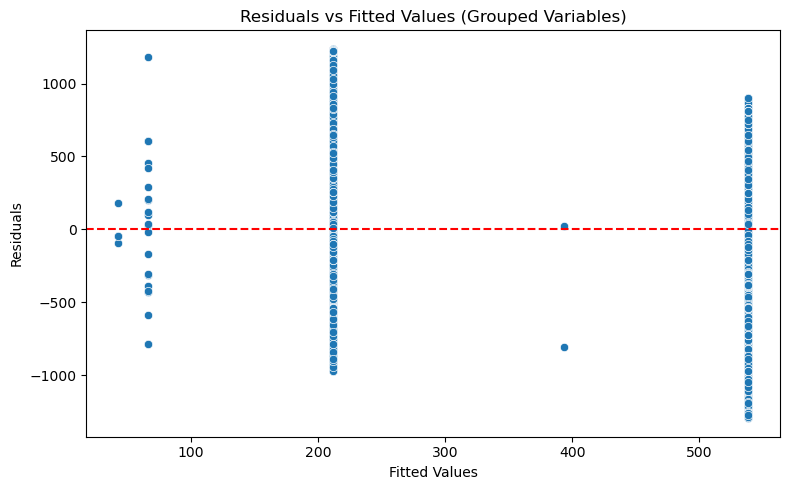

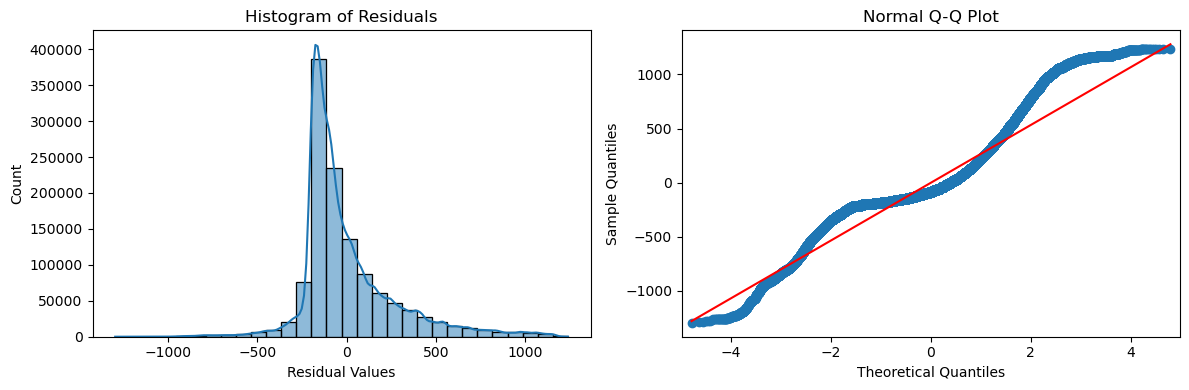

ShapiroResult(statistic=0.7883943846743108, pvalue=1.1680113362992675e-62)


In [150]:
# Step 1: Select relevant columns only
df_model = df_combined[['value_sales', 'customer_district_code', 'business_area_code']]

# Step 2: Create sales-based grouping for customer geography

# Compute average sales by customer_district_code
district_avg_sales = df_model.groupby('customer_district_code')['value_sales'].mean()

def classify_district(sales):
    if sales > 500:
        return 'High'
    elif sales < 100:
        return 'Low'
    else:
        return 'Medium'

df_model['district_perf_group'] = df_model['customer_district_code'].map(lambda x: classify_district(district_avg_sales.get(x, 0)))

# Compute average sales by business_area_code
area_avg_sales = df_model.groupby('business_area_code')['value_sales'].mean()

def classify_area(sales):
    if sales > 500:
        return 'High'
    elif sales < 100:
        return 'Low'
    else:
        return 'Medium'

df_model['area_perf_group'] = df_model['business_area_code'].map(lambda x: classify_area(area_avg_sales.get(x, 0)))

print(df_model['district_perf_group'].unique())
print(df_model['area_perf_group'].unique())

# Step 3: Run regression with grouped variables
df_model = df_model.dropna(subset=['value_sales', 'district_perf_group', 'area_perf_group'])

# Define target and predictors
target = 'value_sales'
features = ['district_perf_group', 'area_perf_group']

# Preprocess categorical variables
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), features)
])

# Transform input features
X = preprocessor.fit_transform(df_model[features])
y = df_model[target]

# Add constant
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Step 4: Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = ['const'] + preprocessor.get_feature_names_out().tolist()
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Output results
print(model.summary())
print("\nVIF Table:")
print(vif_data)

# Residuals and fitted values from your model
residuals = model.resid
fitted_values = model.fittedvalues

# 1. Residuals vs Fitted Plot (Homoscedasticity)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Grouped Variables)")
plt.tight_layout()
plt.show()

# 2. Histogram and Q-Q Plot (Normality Check)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram with KDE
sns.histplot(residuals, ax=axes[0], kde=True, bins=30)
axes[0].set_xlabel('Residual Values')
axes[0].set_title('Histogram of Residuals')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

# 3. Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals[:5000])
print(shapiro_test)

#### Interpretation
**1. District Performance (customer_district_code)**
- Customers in medium-performing districts generate approximately $159 more in sales than those in low-performing districts.
- This effect is statistically significant, showing that district-level characteristics (e.g., population, access, or buyer type) have some influence on sales outcomes.

**2. Business Area Performance (business_area_code)**
- Customers in low-performing areas are associated with a significant decrease of about 496 dollars in sales compared to high-performing areas.
- Even medium-performing areas show a 327 dollars drop in sales relative to high-performing zones.
- These effects are both statistically significant, suggesting that the business area may be a stronger and more reliable geographic predictor of sales than the district.

**3. VIF (Variance Inflation Factor)**

All variables had VIF scores close to 1, confirming no multicollinearity issues and a reliable model structure.

#### Strategic Takeaways
**Use Geography as a Segmentation Layer, Not the Core Driver:** With geography explaining only 2.8% of sales variation, location should be used to enhance segmentation, not define it. Combine geographic insights with customer type, product mix, or purchase behavior for more accurate targeting.

### Section 3.3: Which product features influence unit sales?

                            OLS Regression Results                            
Dep. Variable:         value_quantity   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:50:16   Log-Likelihood:            -5.2436e+06
No. Observations:             1218491   AIC:                         1.049e+07
Df Residuals:                 1218478   BIC:                         1.049e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5810      0.175      9.057      0.0

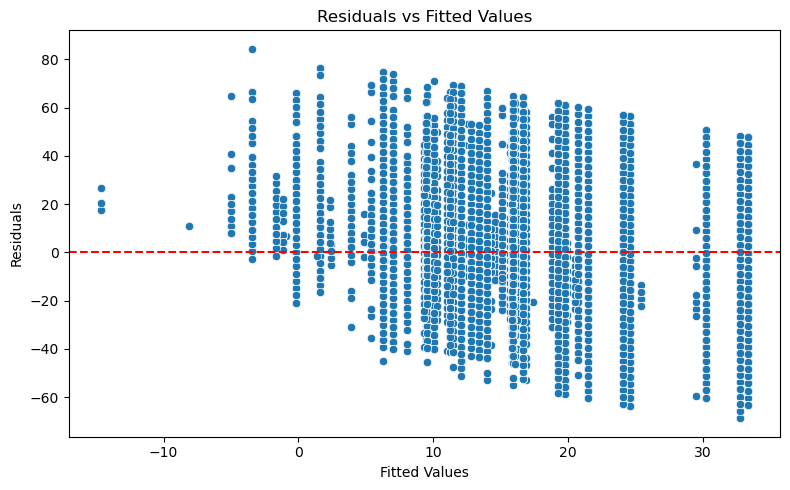

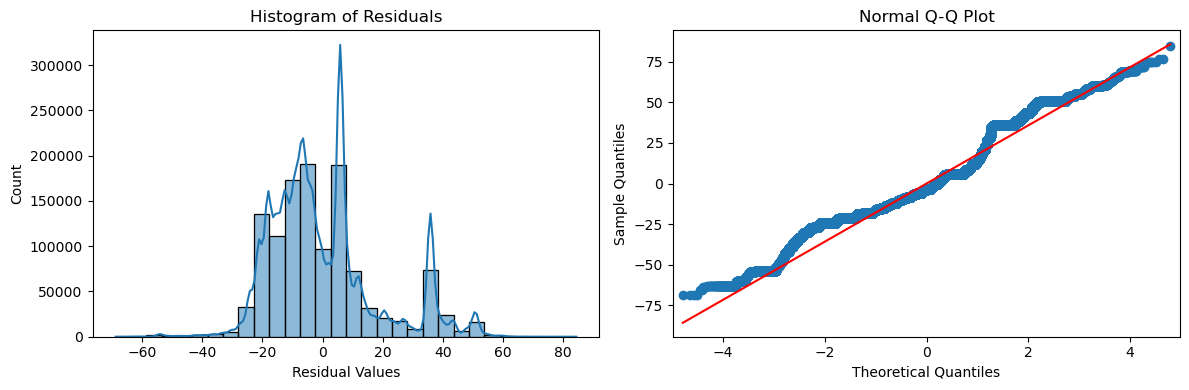

Shapiro-Wilk Test: ShapiroResult(statistic=0.9437839767776317, pvalue=5.17902842990692e-40)


In [154]:
# Define dependent and independent variables
target = 'value_quantity'
selected_features = ['item_type', 'item_group_code', 'light_source']

# Copy relevant columns
df_model = df_combined[[target] + selected_features].copy()

# Reduce categorical variables to top N categories + 'Other'
def reduce_categories(series, top_n=5):
    top_categories = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top_categories else 'Other')

df_model['item_type_reduced'] = reduce_categories(df_model['item_type'])
df_model['item_group_code_reduced'] = reduce_categories(df_model['item_group_code'])
df_model['light_source_reduced'] = reduce_categories(df_model['light_source'])

# Define new reduced feature list
reduced_features = [
    'item_type_reduced',
    'item_group_code_reduced',
    'light_source_reduced'
]

# Convert all categorical features to string
for col in reduced_features:
    df_model[col] = df_model[col].astype(str)

# Drop missing values
df_model = df_model[[target] + reduced_features].dropna()

# Set up one-hot encoding
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), reduced_features)
])

# Transform and convert sparse matrix to dense array
X = preprocessor.fit_transform(df_model[reduced_features]).toarray()
y = df_model[target]

# Add constant for OLS
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = ['const'] + preprocessor.get_feature_names_out().tolist()
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Output results
print(model.summary())
print("\nVIF Table:")
print(vif_data)

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# 1. Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

# 2. Histogram and Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(residuals, ax=axes[0], kde=True, bins=30)
axes[0].set_xlabel("Residual Values")
axes[0].set_title("Histogram of Residuals")

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

# 3. Shapiro-Wilk Normality Test
shapiro_test = stats.shapiro(residuals[:5000])
print("Shapiro-Wilk Test:", shapiro_test)

#### Interpretation
This regression model analysed the impact of product features on unit sales (value_quantity). The model is **statistically significant (p < 0.001)** and **explains approximately 10.6%** of the variation in unit sales (R-squared = 0.106). All included variables—item_type, item_group_code, and light_source—were statistically significant predictors.
- The evidence is in the **positive coefficients and low p-values** for the dummy variables **item_type_reduced_5, 6, 7, and 9**. They are associated with **higher unit sales**, indicating that certain product categories drive stronger demand. 
- In contrast, several product group codes, especially **"Other"** and specific codes like SUR04001, are associated with **lower unit sales**, suggesting these groups may be underperforming or misaligned with customer demand.
- **Traditional light sources** show a **positive effect** on unit sales, suggesting that despite the rise of LED or advanced technologies, traditional lighting still sees consistent demand.

Multicollinearity is generally under control (VIF < 5 for most predictors), though item_group_code_reduced_Other shows a moderately high VIF (~15), indicating some potential overlap with other predictors.

#### Strategic Takeaways
- **Continue Offering Traditional Lighting**: Despite industry shifts toward newer technologies, traditional light sources still contribute positively to sales and should remain part of the core offering, particularly in projects or regions with conservative specifications.
- **Simplify Product Segmentation**: Some multicollinearity suggests overlapping or redundant categories, particularly in item_group_code. Simplifying or consolidating product group definitions could improve both operational clarity and model reliability.
- **Prioritise High-Performing Product Types**: Product types with strong positive coefficients should be prioritized in production, promotion, and inventory planning to maximize unit turnover.

### Critique for Section 4
Overall, the regression model draws some useful and meaningful insights for the business. However, the assumption of those shows that it is not really suitable to use multiple regression model to predict the impact of independent variables to depedent variable such as sale performance. Even when Random Forest is appied to choose the better and more related variables, the results are still not clear and deep.
